In [116]:
#Unemployment Info

In [117]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy.stats import pearsonr 
import requests
import json
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")


In [118]:
#study data files
unemployment_data = pd.read_csv('Resources/UnemploymentRateCity.csv')
unemployment_data = unemployment_data.iloc[12:, :]
unemployment_data = unemployment_data.rename({"Date " : "Date"})

In [119]:
unemployment_data.head(12)

,Date,Philadelphia,Phoenix,San Antonio,San Diego,Dallas
12,Jan-18,6.3,4.5,3.5,3.7,4.0
13,Feb-18,6.4,4.3,3.5,3.5,4.1
14,Mar-18,6.0,4.2,3.4,3.3,3.9
15,Apr-18,5.4,4.0,3.1,3.0,3.6
16,May-18,5.5,3.8,3.1,2.8,3.6
17,Jun-18,6.1,4.5,3.7,3.5,4.1
18,Jul-18,6.5,4.4,3.6,3.5,4.1
19,Aug-18,6.4,4.4,3.5,3.4,3.9
20,Sep-18,5.4,4.2,3.3,3.1,3.8
21,Oct-18,5.2,4.2,3.1,3.2,3.6


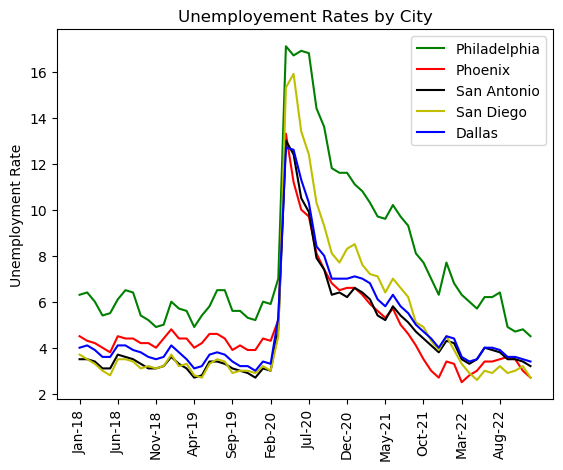

In [120]:
x = np.arange(0, len(unemployment_data['Philadelphia']))
tick_locations = [value for value in x]
dates = [date for date in unemployment_data["Date "]]

plt.plot(unemployment_data["Date "], unemployment_data['Philadelphia'], 'g-', label = "Philadelphia")
plt.plot(unemployment_data["Date "], unemployment_data['Phoenix'], 'r-', label = "Phoenix")
plt.plot(unemployment_data["Date "], unemployment_data['San Antonio'], 'k-', label = "San Antonio")
plt.plot(unemployment_data["Date "], unemployment_data['San Diego'], 'y-', label = "San Diego")
plt.plot(unemployment_data["Date "], unemployment_data['Dallas'], 'b-', label = "Dallas")
plt.title("Unemployement Rates by City")
plt.xticks(range(0,60,5), rotation = 90)
plt.ylabel("Unemployment Rate")
plt.legend()
plt.show()

In [121]:
#Housing Demographics

In [122]:
#Study Data Files 
race_housing_path = "Resources/RaceHousingCity.csv"
age_housing_path = "Resources/AgeHousingCity.csv"
education_housing_path = "Resources/EducationHousingCity.csv"
cities_path= "Resources/Cities.csv"
#Convert to PD
race_housing = pd.read_csv(race_housing_path)
age_housing = pd.read_csv(age_housing_path)
education_housing = pd.read_csv(education_housing_path)
cities_df=pd.read_csv(cities_path)

In [123]:
#MVplot option
cities_df
cities_df["Lat"]=""
cities_df["Lon"]=""
cities_df

,City,Lat,Lon
0,Philadelphia,,
1,Dallas,,
2,Phoenix,,
3,San Antonio,,
4,San Diego,,


In [128]:
cities_df

,City,Lat,Lon
0,Philadelphia,,
1,Dallas,,
2,Phoenix,,
3,San Antonio,,
4,San Diego,,


In [129]:
#Racial Demographics of Household Owner
race_housing

,Racial Demographic of Household Owners,Philadelphia,Dallas,Phoenix,San Antonio,San Diego
0,White,"1,289.20","1,328.20","1,059.40",546.0,512.2
1,Black,254.1,211.5,38.4,41.2,20.2
2,American Indian or Alaska Native,0,0,18.6,9.9,1.4
3,Asian,82.4,125.1,51.7,11.0,52.9
4,Hispanic or Latino,97.6,339,261.3,287.5,101.3


In [130]:
race_housing.columns

Index(['Racial Demographic of Household Owners', 'Philadelphia', 'Dallas',
       'Phoenix', 'San Antonio', 'San Diego'],
      dtype='object')

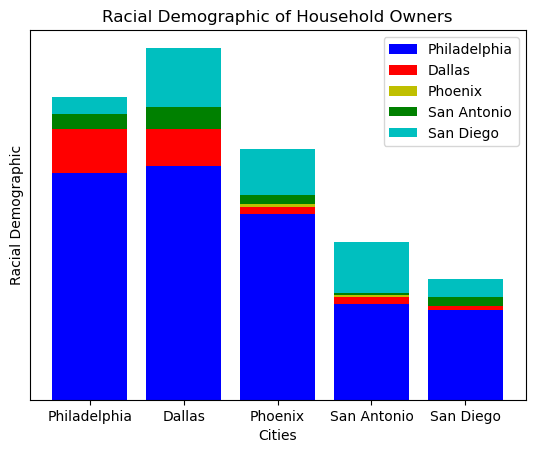

In [131]:
x =["Philadelphia", "Dallas", "Phoenix", "San Antonio", "San Diego"]
y1 = np.array([1289.20, 1328.20, 1059.40, 546, 512.2])
y2 = np.array([254.1, 211.5, 38.4, 41.2, 20.2])
y3 = np.array([0,0,18.6,9.9,1.4])
y4 = np.array([82.4, 125.1, 51.7,11,52.9])
y5 = np.array([97.6, 339, 261.3, 287.5, 101.3])

plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel("Cities")
plt.ylabel("Racial Demographic")
plt.tick_params(left = False, right = False , labelleft = False)
plt.savefig("output_data/RacialDemographic.png")
plt.legend(["Philadelphia", "Dallas", "Phoenix", "San Antonio", "San Diego"])
plt.title("Racial Demographic of Household Owners")

plt.show()

In [132]:
#Age of Household Owner
age_housing

,Age of Household,Philadelphia,Dallas,Phoenix,San Antonio,San Diego
0,Under 25 years old,0.0,0.0,0.0,0.0,2.1
1,25 to 29 years old,47.5,60.9,47.7,12.8,11.8
2,30 to 34 years old,104.4,111.2,83.1,46.9,32.5
3,35 to 44 years old,305.7,358.0,202.8,114.7,93.7
4,45 to 54 years old,295.9,360.5,216.8,121.0,136.0
5,55 to 64 years old,383.5,350.0,242.5,142.4,138.3
6,65 to 74 years old,299.3,259.4,223.9,98.9,82.7
7,75 years old and over,205.3,183.1,163.4,72.8,98.6


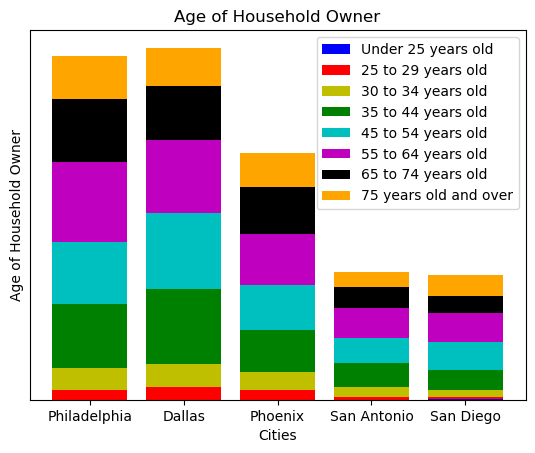

In [133]:
x =["Philadelphia", "Dallas", "Phoenix", "San Antonio", "San Diego"]
y1=np.array([0,0,0,0,2.1])
y2=np.array([47.5,60.9,47.7,12.8,11.8])
y3=np.array([104.4,111.2,83.1,46.9,32.5])
y4=np.array([305.7,358,202.8,114.7,93.7])
y5=np.array([295.9,360.5,216.8,121,136])
y6=np.array([383.5,350,242.5,142.4,138.3])
y7=np.array([299.3,259.4,223.9,98.9,82.7])
y8=np.array([205.3,183.1,163.4,72.8,98.6])

plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='m')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color='k')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color='orange')

plt.xlabel("Cities")
plt.ylabel("Age of Household Owner")
plt.tick_params(left = False, right = False , labelleft = False)
plt.legend(['Under 25 years old', "25 to 29 years old", "30 to 34 years old", "35 to 44 years old", "45 to 54 years old","55 to 64 years old","65 to 74 years old","75 years old and over"])
plt.savefig("output_data/AgeofOwner.png")
plt.title("Age of Household Owner")

plt.show()

In [134]:
#Education Level of Household Owner
education_housing

,Education Level of Household Owner,Philadelphia,Dallas,Phoenix,San Antonio,San Diego
0,Less than 9th grade,19.4,61.8,49.4,26.9,19.4
1,"9th to 12th grade, no diploma",31.2,98.0,47.7,38.0,31.2
2,High school graduate (includes equivalency),102.2,313.2,239.2,141.4,102.2
3,Additional vocational training,10.2,37.7,28.5,12.0,10.2
4,"Some college, no degree",111.0,272.7,215.4,105.7,111.0
5,Associate's degree,46.5,128.4,151.2,66.8,46.5
6,Bachelor's degree,159.9,504.4,283.6,138.9,159.9
7,Graduate or professional degree,125.6,313.8,200.6,95.8,125.6


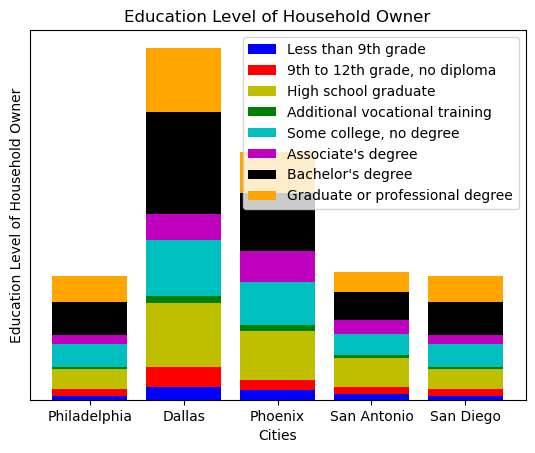

In [135]:
x =["Philadelphia", "Dallas", "Phoenix", "San Antonio", "San Diego"]
y1=np.array([19.4,61.8,49.4,26.9,19.4])
y2=np.array([31.2,98,47.7,38,31.2])
y3=np.array([102.2,313.2,239.2,141.4,102.2])
y4=np.array([10.2,37.7,28.5,12,10.2])
y5=np.array([111,272.7,215.4,105.7,111])
y6=np.array([46.5,128.4,151.2,66.8,46.5])
y7=np.array([159.9,504.4,283.6,138.9,159.9])
y8=np.array([125.6,313.8,200.6,95.8,125.6])

plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='c')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='m')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color='k')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color='orange')

plt.xlabel("Cities")
plt.ylabel("Education Level of Household Owner")
plt.tick_params(left = False, right = False , labelleft = False)
plt.legend(["Less than 9th grade", "9th to 12th grade, no diploma", "High school graduate", "Additional vocational training", "Some college, no degree","Associate's degree", "Bachelor's degree", "Graduate or professional degree"])
plt.savefig("output_data/EducationLevel.png")
plt.title("Education Level of Household Owner")

plt.show()

In [136]:
#Home Values

In [137]:
# Study data files
ZHVI_path = "Resources/ZHVI-CityData.csv"
ZHVI_df = pd.read_csv(ZHVI_path)
ZHVI_df = ZHVI_df.iloc[1:]
ZHVI_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600.0,402420.0,403637.0,406011.0,408737.0,410437.0,412225.0,416062.0,420738.0,428250.0,434192.0,443588.0,452734.0,463590.0,472375.0,481543.0,490452.0,500489.0,508358.0,514084.0,519412.0,523519.0,529383.0,531647.0,534144.0,533705.0,535258.0,536

In [138]:
pd.options.display.max_columns = None
display(ZHVI_df)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600.0,402420.0,403637.0,406011.0,408737.0,410437.0,412225.0,416062.0,420738.0,428250.0,434192.0,443588.0,452734.0,463590.0,472375.0,481543.0,490452.0,500489.0,508358.0,514084.0,519412.0,523519.0,529383.0,531647.0,534144.0,533705.0,535258.0,536

In [139]:
ZHVI_df["City"] = ZHVI_df["RegionName"] + ", " + ZHVI_df["StateName"]
ZHVI_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,City
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600.0,402420.0,403637.0,406011.0,408737.0,410437.0,412225.0,416062.0,420738.0,428250.0,434192.0,443588.0,452734.0,463590.0,472375.0,481543.0,490452.0,500489.0,508358.0,514084.0,519412.0,523519.0,529383.0,531647.0,534144.0,533705.0,535258.

In [140]:
#Rename 2018 
ZHVI_df = ZHVI_df.rename(columns={"1/31/18":"2018 January",
                                          "2/28/18":"2018 February",
                                          "3/31/18":"2018 March",
                                          "4/30/18":"2018 April",
                                          "5/31/18":"2018 May",
                                          "6/30/18":"2018 June",
                                          "7/31/18":"2018 July",
                                          "8/31/18":"2018 August",
                                          "9/30/18":"2018 September",
                                          "10/31/18":"2018 October",
                                          "11/30/18":"2018 November",
                                          "12/31/18":"2018 December"})

#Rename 2019
ZHVI_df = ZHVI_df.rename(columns={"1/31/19":"2019 January",
                                          "2/28/19":"2019 February",
                                          "3/31/19":"2019 March",
                                          "4/30/19":"2019 April",
                                          "5/31/19":"2019 May",
                                          "6/30/19":"2019 June",
                                          "7/31/19":"2019 July",
                                          "8/31/19":"2019 August",
                                          "9/30/19":"2019 September",
                                          "10/31/19":"2019 October",
                                          "11/30/19":"2019 November",
                                          "12/31/19":"2019 December"})

#Rename 2020
ZHVI_df = ZHVI_df.rename(columns={"1/31/20":"2020 January",
                                          "2/29/20":"2020 February",
                                          "3/31/20":"2020 March",
                                          "4/30/20":"2020 April",
                                          "5/31/20":"2020 May",
                                          "6/30/20":"2020 June",
                                          "7/31/20":"2020 July",
                                          "8/31/20":"2020 August",
                                          "9/30/20":"2020 September",
                                          "10/31/20":"2020 October",
                                          "11/30/20":"2020 November",
                                          "12/31/20":"2020 December"})
#Rename 2021
ZHVI_df = ZHVI_df.rename(columns={"1/31/21":"2021 January",
                                          "2/28/21":"2021 February",
                                          "3/31/21":"2021 March",
                                          "4/30/21":"2021 April",
                                          "5/31/21":"2021 May",
                                          "6/30/21":"2021 June",
                                          "7/31/21":"2021 July",
                                          "8/31/21":"2021 August",
                                          "9/30/21":"2021 September",
                                          "10/31/21":"2021 October",
                                          "11/30/21":"2021 November",
                                          "12/31/21":"2021 December"})
#Rename 2022
ZHVI_df = ZHVI_df.rename(columns={"1/31/22":"2022 January",
                                          "2/28/22":"2022 February",
                                          "3/31/22":"2022 March",
                                          "4/30/22":"2022 April",
                                          "5/31/22":"2022 May",
                                          "6/30/22":"2022 June",
                                          "7/31/22":"2022 July",
                                          "8/31/22":"2022 August",
                                          "9/30/22":"2022 September",
                                          "10/31/22":"2022 October",
                                          "11/30/22":"2022 November",
                                          "12/31/22":"2022 December"})

ZHVI_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,2018 January,2018 February,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December,City
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600

In [141]:
#Reduce DF
ZHVI_reduced = pd.DataFrame(ZHVI_df[["City",
                                        "2018 January",
                                        "2018 February",
                                         "2018 March",
                                         "2018 April",
                                         "2018 May",
                                         "2018 June",
                                         "2018 July",
                                         "2018 August",
                                         "2018 September",
                                         "2018 October",
                                         "2018 November",
                                         "2018 December",
                                         "2019 January",
                                         "2019 February",
                                         "2019 March",
                                         "2019 April",
                                         "2019 May",
                                         "2019 June",
                                         "2019 July",
                                         "2019 August",
                                         "2019 September",
                                         "2019 October",
                                         "2019 November",
                                         "2019 December",
                                         "2020 January",
                                         "2020 February",
                                         "2020 March",
                                         "2020 April",
                                         "2020 May",
                                         "2020 June",
                                         "2020 July",
                                         "2020 August",
                                         "2020 September",
                                         "2020 October",
                                         "2020 November",
                                         "2020 December",
                                         "2021 January",
                                         "2021 February",
                                         "2021 March",
                                         "2021 April",
                                         "2021 May",
                                         "2021 June",
                                         "2021 July",
                                         "2021 August",
                                         "2021 September",
                                         "2021 October",
                                         "2021 November",
                                         "2021 December",
                                         "2022 January",
                                         "2022 February",
                                         "2022 March",
                                         "2022 April",
                                         "2022 May",
                                         "2022 June",
                                         "2022 July",
                                         "2022 August",
                                         "2022 September",
                                         "2022 October",
                                         "2022 November",
                                         "2022 December"]])
#Set index to City 
ZHVI_reduced = ZHVI_reduced.set_index("City")
ZHVI_reduced.head()


,2018 January,2018 February,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Los Angeles, CA",681168.0,688102.0,695080.0,700751.0,703284.0,706267.0,706479.0,707862.0,709389.0,714073.0,716983.0,716940.0,716510.0,714200.0,712145.0,711701.0,712994.0,715498.0,713057.0,713024.0,714364.0,720388.0,723994.0,728316.0,732411.0,740485.0,748546.0,755009.0,752458.0,749179.0,752748.0,763854.0,777799.0,789020.0,796636.0,801144.0,804289.0,812023.0,820470.0,833157.0,849721.0,869901.0,892325.0,905941.0,915684.0,918539.0,922915.0,928517.0,933513.0,942502.0,958517.0,977905.0,995212.0,997168.0,997462.0,982958.0,971301.0,956808.0,953225.0,950715.0
"Houston, TX",178627.0,179178.0,179764.0,180720.0,181723.0,182687.0,183404.0,184325.0,185289.0,186292.0,187241.0,188115.0,189190.0,190096.0,190595.0,190676.0,190823.0,191351.0,191878.0,192504.0,192825.0,193688.0,194252.0,194809.0,194547.0,194814.0,195720.0,197065.0,197928.0,198329.0,198738.0,199651.0,201721.0,203984.0,206465.0,208565.0,210615.0,212993.0,214187.0,215870.0,217986.0,222502.0,227430.0,232778.0,236874.0,240405.0,242820.0,245594.0,248528.0,251887.0,256238.0,260901.0,265355.0,268695.0,270851.0,272191.0,272430.0,273037.0,273431.0,273295.0
"Chicago, IL",251710.0,253854.0,254280.0,254396.0,254457.0,254741.0,254747.0,254540.0,255193.0,255818.0,256894.0,257696.0,257806.0,258311.0,258455.0,259047.0,258756.0,258351.0,257922.0,257486.0,257169.0,256851.0,256768.0,256882.0,257413.0,258369.0,259033.0,259347.0,259245.0,259590.0,261261.0,263392.0,267347.0,270825.0,273619.0,275216.0,275724.0,277911.0,279440.0,282223.0,283224.0,285301.0,287702.0,290701.0,292716.0,294709.0,297239.0,299621.0,301880.0,303167.0,305046.0,306378.0,309186.0,311339.0,312572.0,312253.0,312097.0,312197.0,312381.0,310452.0
"San Antonio, TX",189884.0,190011.0,191133.0,192356.0,193616.0,194503.0,195471.0,196436.0,196813.0,197524.0,197911.0,199399.0,200614.0,202349.0,203062.0,203863.0,204344.0,205016.0,205674.0,206372.0,207478.0,208212.0,208922.0,208848.0,209356.0,209524.0,210465.0,210386.0,210433.0,210258.0,211161.0,212543.0,214773.0,217312.0,219575.0,221459.0,223321.0,225834.0,228386.0,231909.0,236225.0,242123.0,247470.0,253120.0,256904.0,260983.0,264614.0,269271.0,273978.0,278410.0,284072.0,289683.0,294718.0,297669.0,298737.0,299066.0,298893.0,298380.0,298942.0,297568.0
"Phoenix, AZ",221437.0,223419.0,225327.0,226888.0,228156.0,229241.0,230549.0,231879.0,233609.0,234695.0,235344.0,235990.0,237007.0,238300.0,239772.0,240545.0,241191.0,241715.0,242684.0,244431.0,246006.0,247622.0,249108.0,251088.0,253005.0,255043.0,257837.0,261766.0,264411.0,266215.0,268316.0,272515.0,277525.0,282525.0,287910.0,293983.0,301072.0,306788.0,314583.0,320238.0,330922.0,340669.0,352038.0,360716.0,367707.0,374409.0,379651.0,384787.0,389698.0,397232.0,405140.0,415133.0,422840.0,428493.0,426227.0,420175.0,411429.0,407193.0,402934.0,400426.0


In [142]:
philadelphia_df = ZHVI_reduced.loc["Philadelphia, PA"]
phoenix_df = ZHVI_reduced.loc["Phoenix, AZ"]
san_antonio_df = ZHVI_reduced.loc["San Antonio, TX"]
san_diego_df = ZHVI_reduced.loc["San Diego, CA"]
dallas_df = ZHVI_reduced.loc["Dallas, TX"]
dates = list(ZHVI_reduced.columns)

In [143]:
print(dates)

['2018 January', '2018 February', '2018 March', '2018 April', '2018 May', '2018 June', '2018 July', '2018 August', '2018 September', '2018 October', '2018 November', '2018 December', '2019 January', '2019 February', '2019 March', '2019 April', '2019 May', '2019 June', '2019 July', '2019 August', '2019 September', '2019 October', '2019 November', '2019 December', '2020 January', '2020 February', '2020 March', '2020 April', '2020 May', '2020 June', '2020 July', '2020 August', '2020 September', '2020 October', '2020 November', '2020 December', '2021 January', '2021 February', '2021 March', '2021 April', '2021 May', '2021 June', '2021 July', '2021 August', '2021 September', '2021 October', '2021 November', '2021 December', '2022 January', '2022 February', '2022 March', '2022 April', '2022 May', '2022 June', '2022 July', '2022 August', '2022 September', '2022 October', '2022 November', '2022 December']


In [144]:
philadelphia_df

2018 January      161496.0
2018 February     163647.0
2018 March        165874.0
2018 April        167580.0
2018 May          168807.0
2018 June         169456.0
2018 July         170607.0
2018 August       171840.0
2018 September    173354.0
2018 October      174532.0
2018 November     176020.0
2018 December     177729.0
2019 January      179745.0
2019 February     181113.0
2019 March        181761.0
2019 April        181960.0
2019 May          182669.0
2019 June         183376.0
2019 July         184213.0
2019 August       184852.0
2019 September    185659.0
2019 October      186404.0
2019 November     187026.0
2019 December     187934.0
2020 January      188969.0
2020 February     190202.0
2020 March        191534.0
2020 April        192815.0
2020 May          193388.0
2020 June         193877.0
2020 July         195468.0
2020 August       198527.0
2020 September    201300.0
2020 October      204043.0
2020 November     206221.0
2020 December     208723.0
2021 January      211141.0
2

In [145]:
complete_df = pd.DataFrame({"Philadelphia": philadelphia_df,
                            "Phoenix": phoenix_df,
                            "San Antonio": san_antonio_df,
                            "San Diego": san_diego_df,
                            "Dallas": dallas_df})
complete_df

,Philadelphia,Phoenix,San Antonio,San Diego,Dallas
2018 January,161496.0,221437.0,189884.0,601663.0,199922.0
2018 February,163647.0,223419.0,190011.0,608971.0,203655.0
2018 March,165874.0,225327.0,191133.0,613797.0,207001.0
2018 April,167580.0,226888.0,192356.0,613638.0,208492.0
2018 May,168807.0,228156.0,193616.0,613076.0,210099.0
2018 June,169456.0,229241.0,194503.0,614607.0,211560.0
2018 July,170607.0,230549.0,195471.0,617313.0,213455.0
2018 August,171840.0,231879.0,196436.0,621337.0,216229.0
2018 September,173354.0,233609.0,196813.0,622922.0,217434.0
2018 October,174532.0,234695.0,197524.0,625624.0,218126.0


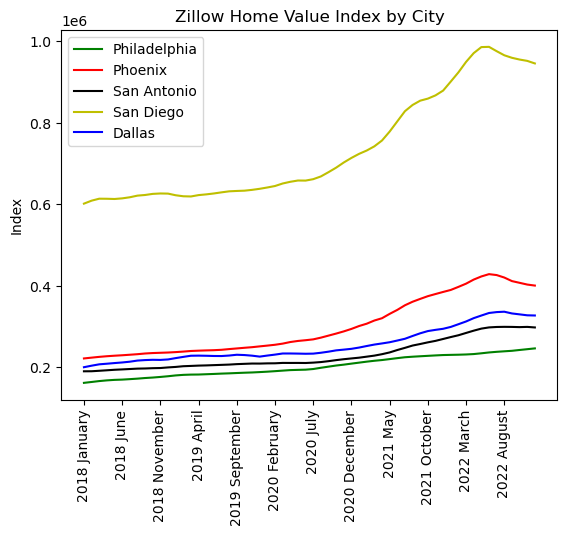

In [146]:
x = np.arange(0, len(dates))

plt.plot(dates, complete_df["Philadelphia"], 'g-', label = "Philadelphia")
plt.plot(dates, complete_df["Phoenix"], 'r-', label = "Phoenix")
plt.plot(dates, complete_df["San Antonio"], 'k-', label = "San Antonio")
plt.plot(dates, complete_df["San Diego"], 'y-', label = "San Diego")
plt.plot(dates, complete_df["Dallas"], 'b-', label = "Dallas")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.title("Zillow Home Value Index by City")
plt.ylabel("Index")
plt.legend()
plt.savefig("output_data/ZHVIGraph.png")
plt.show()

In [147]:
#List Prices

In [148]:
# Study data files
list_prices_path = "Resources/MedianListPrice.csv.csv"
list_prices = pd.read_csv(list_prices_path)
list_prices = list_prices.iloc[1:]
list_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
5,394692,5,"Houston, TX",msa,TX,294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0


In [149]:
pd.options.display.max_columns = None
display(list_prices)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
5,394692,5,"Houston, TX",msa,TX,294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137083.0,131667.0,133332.0,149998.0,166665.0,158583.0,135580.0,112412.0,102828.0,99165.0,103967.0,109967.0,115200.

In [150]:
#Rename 2018 
list_prices = list_prices.rename(columns={"RegionName":"City",
                                          "2018-03-31":"2018 March",
                                          "2018-04-30":"2018 April",
                                          "2018-05-31":"2018 May",
                                          "2018-06-30":"2018 June",
                                          "2018-07-31":"2018 July",
                                          "2018-08-31":"2018 August",
                                          "2018-09-30":"2018 September",
                                          "2018-10-31":"2018 October",
                                          "2018-11-30":"2018 November",
                                          "2018-12-31":"2018 December"})

#Rename 2019
list_prices = list_prices.rename(columns={"2019-01-31":"2019 January",
                                          "2019-02-28":"2019 February",
                                          "2019-03-31":"2019 March",
                                          "2019-04-30":"2019 April",
                                          "2019-05-31":"2019 May",
                                          "2019-06-30":"2019 June",
                                          "2019-07-31":"2019 July",
                                          "2019-08-31":"2019 August",
                                          "2019-09-30":"2019 September",
                                          "2019-10-31":"2019 October",
                                          "2019-11-30":"2019 November",
                                          "2019-12-31":"2019 December"})

#Rename 2020
list_prices = list_prices.rename(columns={"2020-01-31":"2020 January",
                                          "2020-02-29":"2020 February",
                                          "2020-03-31":"2020 March",
                                          "2020-04-30":"2020 April",
                                          "2020-05-31":"2020 May",
                                          "2020-06-30":"2020 June",
                                          "2020-07-31":"2020 July",
                                          "2020-08-31":"2020 August",
                                          "2020-09-30":"2020 September",
                                          "2020-10-31":"2020 October",
                                          "2020-11-30":"2020 November",
                                          "2020-12-31":"2020 December"})
#Rename 2021
list_prices = list_prices.rename(columns={"2021-01-31":"2021 January",
                                          "2021-02-28":"2021 February",
                                          "2021-03-31":"2021 March",
                                          "2021-04-30":"2021 April",
                                          "2021-05-31":"2021 May",
                                          "2021-06-30":"2021 June",
                                          "2021-07-31":"2021 July",
                                          "2021-08-31":"2021 August",
                                          "2021-09-30":"2021 September",
                                          "2021-10-31":"2021 October",
                                          "2021-11-30":"2021 November",
                                          "2021-12-31":"2021 December"})
#Rename 2022
list_prices = list_prices.rename(columns={"2022-01-31":"2022 January",
                                          "2022-02-28":"2022 February",
                                          "2022-03-31":"2022 March",
                                          "2022-04-30":"2022 April",
                                          "2022-05-31":"2022 May",
                                          "2022-06-30":"2022 June",
                                          "2022-07-31":"2022 July",
                                          "2022-08-31":"2022 August",
                                          "2022-09-30":"2022 September",
                                          "2022-10-31":"2022 October",
                                          "2022-11-30":"2022 November",
                                          "2022-12-31":"2022 December"})

list_prices.head()

,RegionID,SizeRank,City,RegionType,StateName,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
5,394692,5,"Houston, TX",msa,TX,294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0


In [151]:
#Reduce DF
list_reduced = pd.DataFrame(list_prices[["City",
                                         "2018 March",
                                         "2018 April",
                                         "2018 May",
                                         "2018 June",
                                         "2018 July",
                                         "2018 August",
                                         "2018 September",
                                         "2018 October",
                                         "2018 November",
                                         "2018 December",
                                         "2019 January",
                                         "2019 February",
                                         "2019 March",
                                         "2019 April",
                                         "2019 May",
                                         "2019 June",
                                         "2019 July",
                                         "2019 August",
                                         "2019 September",
                                         "2019 October",
                                         "2019 November",
                                         "2019 December",
                                         "2020 January",
                                         "2020 February",
                                         "2020 March",
                                         "2020 April",
                                         "2020 May",
                                         "2020 June",
                                         "2020 July",
                                         "2020 August",
                                         "2020 September",
                                         "2020 October",
                                         "2020 November",
                                         "2020 December",
                                         "2021 January",
                                         "2021 February",
                                         "2021 March",
                                         "2021 April",
                                         "2021 May",
                                         "2021 June",
                                         "2021 July",
                                         "2021 August",
                                         "2021 September",
                                         "2021 October",
                                         "2021 November",
                                         "2021 December",
                                         "2022 January",
                                         "2022 February",
                                         "2022 March",
                                         "2022 April",
                                         "2022 May",
                                         "2022 June",
                                         "2022 July",
                                         "2022 August",
                                         "2022 September",
                                         "2022 October",
                                         "2022 November",
                                         "2022 December"]])
#Set index to City 
list_reduced = list_reduced.set_index("City")
list_reduced.head()

,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"New York, NY",503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
"Los Angeles, CA",721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
"Chicago, IL",284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
"Dallas, TX",322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
"Houston, TX",294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0


In [152]:
dates=list_reduced.columns
print(dates)

Index(['2018 March', '2018 April', '2018 May', '2018 June', '2018 July',
       '2018 August', '2018 September', '2018 October', '2018 November',
       '2018 December', '2019 January', '2019 February', '2019 March',
       '2019 April', '2019 May', '2019 June', '2019 July', '2019 August',
       '2019 September', '2019 October', '2019 November', '2019 December',
       '2020 January', '2020 February', '2020 March', '2020 April', '2020 May',
       '2020 June', '2020 July', '2020 August', '2020 September',
       '2020 October', '2020 November', '2020 December', '2021 January',
       '2021 February', '2021 March', '2021 April', '2021 May', '2021 June',
       '2021 July', '2021 August', '2021 September', '2021 October',
       '2021 November', '2021 December', '2022 January', '2022 February',
       '2022 March', '2022 April', '2022 May', '2022 June', '2022 July',
       '2022 August', '2022 September', '2022 October', '2022 November',
       '2022 December'],
      dtype='object')


In [153]:
philadelphia_df = list_reduced.loc["Philadelphia, PA"]
dallas_df = list_reduced.loc["Dallas, TX"]
phoenix_df = list_reduced.loc["Phoenix, AZ"]
san_antonio_df = list_reduced.loc["San Antonio, TX"]
san_diego_df = list_reduced.loc["San Diego, CA"]

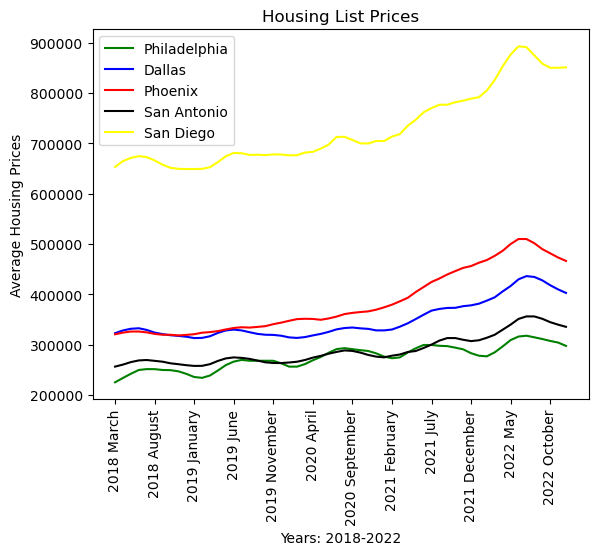

In [154]:
x = np.arange(0, len(philadelphia_df))
plt.plot(dates, philadelphia_df, color="green", label="Philadelphia")
plt.plot(dates, dallas_df, color="blue", label="Dallas")
plt.plot(dates, phoenix_df, color="red", label="Phoenix")
plt.plot(dates, san_antonio_df, color="black", label="San Antonio")
plt.plot(dates, san_diego_df, color="yellow", label="San Diego")
plt.title("Housing List Prices")
plt.xlabel("Years: 2018-2022")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.ylabel("Average Housing Prices")
plt.savefig("output_data/HousingListPrice.png")
plt.legend()

In [155]:
#Sale Prices

In [156]:
# Study data files
sale_prices_path = "Resources/MedianSalePrice.csv.csv"
sale_prices = pd.read_csv(sale_prices_path)
sale_prices = sale_prices.iloc[1:]
sale_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
1,394913,1,"New York, NY",msa,NY,401124.0,399484.0,401484.0,407333.0,414000.0,412333.0,401667.0,387608.0,378942.0,372275.0,368000.0,361667.0,356667.0,355000.0,357667.0,366000.0,371833.0,374167.0,370833.0,367500.0,361667.0,361667.0,363333.0,362500.0,361417.0,360583.0,367250.0,375000.0,385000.0,NaN,NaN,322833.0,NaN,367992.0,367909.0,365409.0,364417.0,361667.0,366667.0,373333.0,378333.0,380000.0,370000.0,356667.0,345000.0,340000.0,338333.0,338333.0,341667.0,347333.0,359000.0,368000.0,374000.0,370667.0,363833.0,357167.0,352167.0,350000.0,346667.0,343167.0,338167.0,344083.0,354617.0,369617.0,380367.0,381667.0,376000.0,362667.0,355967.0,354967.0,356633.0,355000.0,351667.0,353333.0,361667.0,373333.0,383333.0,383300.0,374967.0,365633.0,360667.0,363667.0,363250.0,361583.0,358583.0,361667.0,371667.0,381667.0,390000.0,390000.0,383332.0,374999.0,370666.0,369667.0,369667.0,367333.0,366667.0,368333.0,376667.0,388333.0,397451.0,397088.0,392088.0,384638.0,380000.0,377716.0,378382.0,378382.0,380667.0,384667.0,396333.0,410667.0,419000.0,417333.0,403750.0,395333.0,390333.0,394250.0,393667.0,395333.0,395333.0,399667.0,408000.0,418333.0,425000.0,425000.0,415000.0,407500.0,400000.0,400000.0,399167.0,398000.0,396333.0,398000.0,408333.0,421667.0,428333.0,426667.0,420000.0,415000.0,413333.0,413333.0,416667.0,417500.0,420833.0,422833.0,429833.0,435500.0,443500.0,449000.0,456667.0,463333.0,467333.0,467500.0,469167.0,470167.0,476667.0,485000.0,501083.0,516083.0,526083.0,530000.0,526667.0,520000.0,513333.0,511721.0,513888.0,518888.0,527167.0,537167.0,552167.0,567167.0,578333.0,575000.0,560000.0,544817.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,495000.0,490667.0,480667.0,467333.0,452000.0,440000.0,425000.0,416333.0,400333.0,399500.0,394500.0,395833.0,396667.0,404667.0,412417.0,412417.0,411417.0,407000.0,405333.0,398333.0,395000.0,388333.0,388333.0,388333.0,396667.0,396667.0,400000.0,396667.0,398333.0,391667.0,389667.0,384333.0,381000.0,374667.0,375000.0,378667.0,382917.0,384583.0,387583.0,385000.0,381667

In [157]:
pd.options.display.max_columns = None
display(sale_prices)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
1,394913,1,"New York, NY",msa,NY,401124.0,399484.0,401484.0,407333.0,414000.0,412333.0,401667.0,387608.0,378942.0,372275.0,368000.0,361667.0,356667.0,355000.0,357667.0,366000.0,371833.0,374167.0,370833.0,367500.0,361667.0,361667.0,363333.0,362500.0,361417.0,360583.0,367250.0,375000.0,385000.0,NaN,NaN,322833.0,NaN,367992.0,367909.0,365409.0,364417.0,361667.0,366667.0,373333.0,378333.0,380000.0,370000.0,356667.0,345000.0,340000.0,338333.0,338333.0,341667.0,347333.0,359000.0,368000.0,374000.0,370667.0,363833.0,357167.0,352167.0,350000.0,346667.0,343167.0,338167.0,344083.0,354617.0,369617.0,380367.0,381667.0,376000.0,362667.0,355967.0,354967.0,356633.0,355000.0,351667.0,353333.0,361667.0,373333.0,383333.0,383300.0,374967.0,365633.0,360667.0,363667.0,363250.0,361583.0,358583.0,361667.0,371667.0,381667.0,390000.0,390000.0,383332.0,374999.0,370666.0,369667.0,369667.0,367333.0,366667.0,368333.0,376667.0,388333.0,397451.0,397088.0,392088.0,384638.0,380000.0,377716.0,378382.0,378382.0,380667.0,384667.0,396333.0,410667.0,419000.0,417333.0,403750.0,395333.0,390333.0,394250.0,393667.0,395333.0,395333.0,399667.0,408000.0,418333.0,425000.0,425000.0,415000.0,407500.0,400000.0,400000.0,399167.0,398000.0,396333.0,398000.0,408333.0,421667.0,428333.0,426667.0,420000.0,415000.0,413333.0,413333.0,416667.0,417500.0,420833.0,422833.0,429833.0,435500.0,443500.0,449000.0,456667.0,463333.0,467333.0,467500.0,469167.0,470167.0,476667.0,485000.0,501083.0,516083.0,526083.0,530000.0,526667.0,520000.0,513333.0,511721.0,513888.0,518888.0,527167.0,537167.0,552167.0,567167.0,578333.0,575000.0,560000.0,544817.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,495000.0,490667.0,480667.0,467333.0,452000.0,440000.0,425000.0,416333.0,400333.0,399500.0,394500.0,395833.0,396667.0,404667.0,412417.0,412417.0,411417.0,407000.0,405333.0,398333.0,395000.0,388333.0,388333.0,388333.0,396667.0,396667.0,400000.0,396667.0,398333.0,391667.0,389667.0,384333.0,381000.0,374667.0,375000.0,378667.0,382917.0,384583.0,387583.0,385000.0,381667

In [158]:
#Rename 2018 
sale_prices = sale_prices.rename(columns={"RegionName":"City",
                                          "2018-03-31":"2018 March",
                                          "2018-04-30":"2018 April",
                                          "2018-05-31":"2018 May",
                                          "2018-06-30":"2018 June",
                                          "2018-07-31":"2018 July",
                                          "2018-08-31":"2018 August",
                                          "2018-09-30":"2018 September",
                                          "2018-10-31":"2018 October",
                                          "2018-11-30":"2018 November",
                                          "2018-12-31":"2018 December"})

#Rename 2019
sale_prices = sale_prices.rename(columns={"2019-01-31":"2019 January",
                                          "2019-02-28":"2019 February",
                                          "2019-03-31":"2019 March",
                                          "2019-04-30":"2019 April",
                                          "2019-05-31":"2019 May",
                                          "2019-06-30":"2019 June",
                                          "2019-07-31":"2019 July",
                                          "2019-08-31":"2019 August",
                                          "2019-09-30":"2019 September",
                                          "2019-10-31":"2019 October",
                                          "2019-11-30":"2019 November",
                                          "2019-12-31":"2019 December"})

#Rename 2020
sale_prices = sale_prices.rename(columns={"2020-01-31":"2020 January",
                                          "2020-02-29":"2020 February",
                                          "2020-03-31":"2020 March",
                                          "2020-04-30":"2020 April",
                                          "2020-05-31":"2020 May",
                                          "2020-06-30":"2020 June",
                                          "2020-07-31":"2020 July",
                                          "2020-08-31":"2020 August",
                                          "2020-09-30":"2020 September",
                                          "2020-10-31":"2020 October",
                                          "2020-11-30":"2020 November",
                                          "2020-12-31":"2020 December"})
#Rename 2021
sale_prices = sale_prices.rename(columns={"2021-01-31":"2021 January",
                                          "2021-02-28":"2021 February",
                                          "2021-03-31":"2021 March",
                                          "2021-04-30":"2021 April",
                                          "2021-05-31":"2021 May",
                                          "2021-06-30":"2021 June",
                                          "2021-07-31":"2021 July",
                                          "2021-08-31":"2021 August",
                                          "2021-09-30":"2021 September",
                                          "2021-10-31":"2021 October",
                                          "2021-11-30":"2021 November",
                                          "2021-12-31":"2021 December"})
#Rename 2022
sale_prices = sale_prices.rename(columns={"2022-01-31":"2022 January",
                                          "2022-02-28":"2022 February",
                                          "2022-03-31":"2022 March",
                                          "2022-04-30":"2022 April",
                                          "2022-05-31":"2022 May",
                                          "2022-06-30":"2022 June",
                                          "2022-07-31":"2022 July",
                                          "2022-08-31":"2022 August",
                                          "2022-09-30":"2022 September",
                                          "2022-10-31":"2022 October",
                                          "2022-11-30":"2022 November",
                                          "2022-12-31":"2022 December"})

sale_prices.head()

,RegionID,SizeRank,City,RegionType,StateName,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November
1,394913,1,"New York, NY",msa,NY,401124.0,399484.0,401484.0,407333.0,414000.0,412333.0,401667.0,387608.0,378942.0,372275.0,368000.0,361667.0,356667.0,355000.0,357667.0,366000.0,371833.0,374167.0,370833.0,367500.0,361667.0,361667.0,363333.0,362500.0,361417.0,360583.0,367250.0,375000.0,385000.0,NaN,NaN,322833.0,NaN,367992.0,367909.0,365409.0,364417.0,361667.0,366667.0,373333.0,378333.0,380000.0,370000.0,356667.0,345000.0,340000.0,338333.0,338333.0,341667.0,347333.0,359000.0,368000.0,374000.0,370667.0,363833.0,357167.0,352167.0,350000.0,346667.0,343167.0,338167.0,344083.0,354617.0,369617.0,380367.0,381667.0,376000.0,362667.0,355967.0,354967.0,356633.0,355000.0,351667.0,353333.0,361667.0,373333.0,383333.0,383300.0,374967.0,365633.0,360667.0,363667.0,363250.0,361583.0,358583.0,361667.0,371667.0,381667.0,390000.0,390000.0,383332.0,374999.0,370666.0,369667.0,369667.0,367333.0,366667.0,368333.0,376667.0,388333.0,397451.0,397088.0,392088.0,384638.0,380000.0,377716.0,378382.0,378382.0,380667.0,384667.0,396333.0,410667.0,419000.0,417333.0,403750.0,395333.0,390333.0,394250.0,393667.0,395333.0,395333.0,399667.0,408000.0,418333.0,425000.0,425000.0,415000.0,407500.0,400000.0,400000.0,399167.0,398000.0,396333.0,398000.0,408333.0,421667.0,428333.0,426667.0,420000.0,415000.0,413333.0,413333.0,416667.0,417500.0,420833.0,422833.0,429833.0,435500.0,443500.0,449000.0,456667.0,463333.0,467333.0,467500.0,469167.0,470167.0,476667.0,485000.0,501083.0,516083.0,526083.0,530000.0,526667.0,520000.0,513333.0,511721.0,513888.0,518888.0,527167.0,537167.0,552167.0,567167.0,578333.0,575000.0,560000.0,544817.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,495000.0,490667.0,480667.0,467333.0,452000.0,440000.0,425000.0,416333.0,400333.0,399500.0,394500.0,395833.0,396667.0,404667.0,412417.0,412417.0,411417.0,407000.0,405333.0,398333.0,395000.0,388333.0,388333.0,388333.0,396667.0,396667.0,400000.0,396667.0,398333.0,391667.0,389667.0,384333.0,381000.0,374667.0,3750

In [159]:
#Reduce DF
sale_reduced = pd.DataFrame(sale_prices[["City",
                                         "2018 March",
                                         "2018 April",
                                         "2018 May",
                                         "2018 June",
                                         "2018 July",
                                         "2018 August",
                                         "2018 September",
                                         "2018 October",
                                         "2018 November",
                                         "2018 December",
                                         "2019 January",
                                         "2019 February",
                                         "2019 March",
                                         "2019 April",
                                         "2019 May",
                                         "2019 June",
                                         "2019 July",
                                         "2019 August",
                                         "2019 September",
                                         "2019 October",
                                         "2019 November",
                                         "2019 December",
                                         "2020 January",
                                         "2020 February",
                                         "2020 March",
                                         "2020 April",
                                         "2020 May",
                                         "2020 June",
                                         "2020 July",
                                         "2020 August",
                                         "2020 September",
                                         "2020 October",
                                         "2020 November",
                                         "2020 December",
                                         "2021 January",
                                         "2021 February",
                                         "2021 March",
                                         "2021 April",
                                         "2021 May",
                                         "2021 June",
                                         "2021 July",
                                         "2021 August",
                                         "2021 September",
                                         "2021 October",
                                         "2021 November",
                                         "2021 December",
                                         "2022 January",
                                         "2022 February",
                                         "2022 March",
                                         "2022 April",
                                         "2022 May",
                                         "2022 June",
                                         "2022 July",
                                         "2022 August",
                                         "2022 September",
                                         "2022 October",
                                         "2022 November",]])

#Set index to City 
sale_reduced = sale_reduced.set_index("City")
sale_reduced.head()

,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"New York, NY",395333.0,395333.0,399667.0,408000.0,418333.0,425000.0,425000.0,415000.0,407500.0,400000.0,400000.0,399167.0,398000.0,396333.0,398000.0,408333.0,421667.0,428333.0,426667.0,420000.0,415000.0,413333.0,413333.0,416667.0,417500.0,420833.0,422833.0,429833.0,435500.0,443500.0,449000.0,456667.0,463333.0,467333.0,467500.0,469167.0,470167.0,476667.0,485000.0,501083.0,516083.0,526083.0,530000.0,526667.0,520000.0,513333.0,511721.0,513888.0,518888.0,527167.0,537167.0,552167.0,567167.0,578333.0,575000.0,560000.0,544817.0
"Los Angeles, CA",608500.0,620167.0,628500.0,637833.0,642833.0,642833.0,635000.0,630000.0,626667.0,621333.0,613000.0,608083.0,614750.0,628083.0,636333.0,642667.0,650000.0,650750.0,649750.0,642417.0,641667.0,643333.0,646000.0,649333.0,656000.0,658333.0,658333.0,660000.0,678333.0,701667.0,720000.0,726667.0,728333.0,726667.0,723333.0,730000.0,746000.0,772667.0,796833.0,814167.0,820833.0,823333.0,823333.0,825000.0,826667.0,832833.0,834500.0,846167.0,865000.0,900000.0,923000.0,928000.0,913000.0,894333.0,877667.0,865417.0,856083.0
"Chicago, IL",220833.0,228167.0,235667.0,241967.0,244133.0,241767.0,234467.0,227300.0,223000.0,220667.0,218833.0,218833.0,223167.0,230333.0,238667.0,244333.0,248000.0,246333.0,240056.0,233723.0,230389.0,228667.0,225333.0,223667.0,229167.0,241167.0,248833.0,251333.0,252633.0,258967.0,262300.0,264000.0,260667.0,259000.0,254000.0,251333.0,253583.0,262583.0,275917.0,285500.0,289833.0,289833.0,286333.0,281333.0,276667.0,273333.0,271440.0,269773.0,273107.0,283333.0,295333.0,307000.0,310333.0,308333.0,298333.0,288000.0,281333.0
"Dallas, TX",246333.0,254633.0,260633.0,266600.0,268300.0,265967.0,259000.0,253983.0,250616.0,250283.0,246967.0,247000.0,250000.0,257000.0,265000.0,270500.0,273500.0,272167.0,267633.0,265967.0,262633.0,263333.0,261667.0,263300.0,266300.0,272967.0,275333.0,279000.0,284000.0,291667.0,295000.0,296633.0,298267.0,298267.0,294967.0,297917.0,306250.0,319583.0,333333.0,345000.0,353333.0,354417.0,352750.0,352417.0,352000.0,355333.0,355683.0,361017.0,370017.0,390000.0,409000.0,421389.0,419722.0,411389.0,399333.0,391000.0,382667.0
"Houston, TX",210917.0,218350.0,224667.0,229000.0,230000.0,228333.0,224967.0,221600.0,219267.0,219842.0,217208.0,216875.0,218667.0,224667.0,232000.0,237000.0,239667.0,238500.0,234467.0,230133.0,228300.0,229967.0,229300.0,229300.0,229333.0,234967.0,236633.0,241633.0,248333.0,256633.0,258300.0,257300.0,257333.0,260333.0,259000.0,260667.0,267167.0,278958.0,290625.0,299458.0,303667.0,303667.0,298650.0,296650.0,298317.0,302400.0,303995.0,307328.0,311595.0,322333.0,333333.0,342000.0,344667.0,338333.0,331333.0,322333.0,316000.0


In [160]:
philadelphia_df = sale_reduced.loc["Philadelphia, PA"]
dallas_df = sale_reduced.loc["Dallas, TX"]
phoenix_df = sale_reduced.loc["Phoenix, AZ"]
san_antonio_df = sale_reduced.loc["San Antonio, TX"]
san_diego_df = sale_reduced.loc["San Diego, CA"]

In [161]:
dates=sale_reduced.columns
print(dates)

Index(['2018 March', '2018 April', '2018 May', '2018 June', '2018 July',
       '2018 August', '2018 September', '2018 October', '2018 November',
       '2018 December', '2019 January', '2019 February', '2019 March',
       '2019 April', '2019 May', '2019 June', '2019 July', '2019 August',
       '2019 September', '2019 October', '2019 November', '2019 December',
       '2020 January', '2020 February', '2020 March', '2020 April', '2020 May',
       '2020 June', '2020 July', '2020 August', '2020 September',
       '2020 October', '2020 November', '2020 December', '2021 January',
       '2021 February', '2021 March', '2021 April', '2021 May', '2021 June',
       '2021 July', '2021 August', '2021 September', '2021 October',
       '2021 November', '2021 December', '2022 January', '2022 February',
       '2022 March', '2022 April', '2022 May', '2022 June', '2022 July',
       '2022 August', '2022 September', '2022 October', '2022 November'],
      dtype='object')


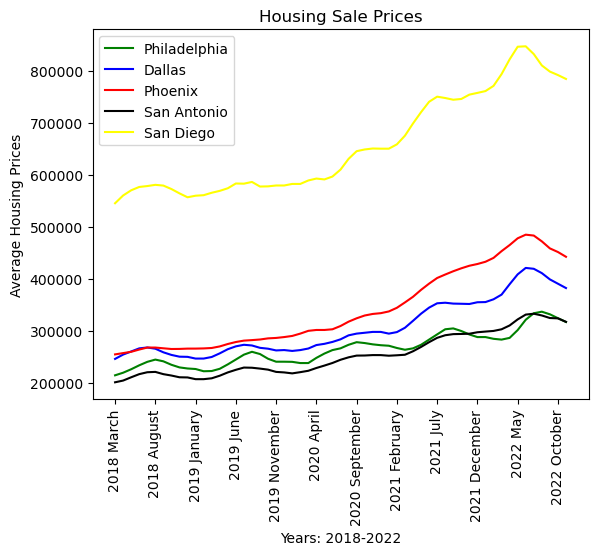

In [162]:
x = np.arange(0, len(philadelphia_df))
plt.plot(dates, philadelphia_df, color="green", label="Philadelphia")
plt.plot(dates, dallas_df, color="blue", label="Dallas")
plt.plot(dates, phoenix_df, color="red", label="Phoenix")
plt.plot(dates, san_antonio_df, color="black", label="San Antonio")
plt.plot(dates, san_diego_df, color="yellow", label="San Diego")
plt.title("Housing Sale Prices")
plt.xlabel("Years: 2018-2022")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.ylabel("Average Housing Prices")
plt.savefig("output_data/HousingSalePrice.png")
plt.legend()

In [163]:
#Average Number of New Listings

In [165]:
# Load CSV Files
monthly_listings_path = "Resources/NumberofNewMonthlyListings.csv"
monthly_listings = pd.read_csv(monthly_listings_path)

#Set index to City 
monthly_listings = monthly_listings.set_index("City")

monthly_listings.head()

,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Jan 2021,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",8606,10075,11442,12067,12108,11538,10225,8969,7905,6682,6651,7125,9180,10334,11689,11930,11778,10912,9878,9119,8124,7003,6767,7456,8964,9009,9628,10141,11222,10890,10099,9256,8209,7131,6779,6632,7958,9100,10597,11368,11983,11996,11332,10118,9091,7848,6990,6728,7607,8689,10001,11389,11771,11099,9590,8160,6999,5485
"Philadelphia, PA",7002,8434,9442,9570,8909,8015,7391,7145,6481,5320,4959,5248,7016,8326,9523,9381,8676,7687,7223,6877,6141,4808,4313,4929,6147,5622,5599,6152,7762,8471,8432,8417,7371,5974,5054,5017,6413,7695,9127,9758,9828,9461,8765,8034,7168,5844,4895,4833,6105,7402,8267,8649,8213,7608,6704,6159,5429,4288
"Phoenix, AZ",8913,9152,9248,8766,8143,7914,7621,7950,7520,6583,6623,6850,8252,8355,8781,8271,7674,7305,7243,7619,7094,6158,6047,6481,7958,7689,7490,6797,7120,7701,8422,9069,8415,7225,6374,6603,7671,8397,8832,8940,8840,8849,8756,8613,8076,7086,6492,6517,7444,8174,9044,9740,9821,9202,8070,7009,5917,4644
"San Antonio, TX",2639,3060,3402,3479,3439,3255,2839,2556,2270,2053,2062,2170,2757,3103,3495,3532,3492,3279,2984,2740,2441,2156,2063,2250,2694,2723,2860,2899,3176,3149,3041,2870,2582,2239,2141,2061,2460,2771,3344,3678,3988,4011,3770,3384,3021,2655,2368,2292,2663,3079,3532,3861,3984,3878,3460,3020,2556,2078
"San Diego, CA",3193,3527,3791,3902,3969,3907,3615,3345,2911,2374,2293,2380,3066,3369,3819,3868,3766,3550,3272,3110,2654,2189,2077,2360,2931,2787,2817,2834,3350,3557,3636,3571,3179,2696,2416,2536,3000,3317,3665,3896,4057,3931,3626,3191,2819,2323,2183,2265,2807,3153,3432,3579,3475,3183,2717,2323,1974,1522


In [166]:
dates= monthly_listings.columns

In [167]:
philadelphia_df = monthly_listings.loc["Philadelphia, PA"]
dallas_df = monthly_listings.loc["Dallas, TX"]
phoenix_df = monthly_listings.loc["Phoenix, AZ"]
san_antonio_df = monthly_listings.loc["San Antonio, TX"]
san_diego_df = monthly_listings.loc["San Diego, CA"]

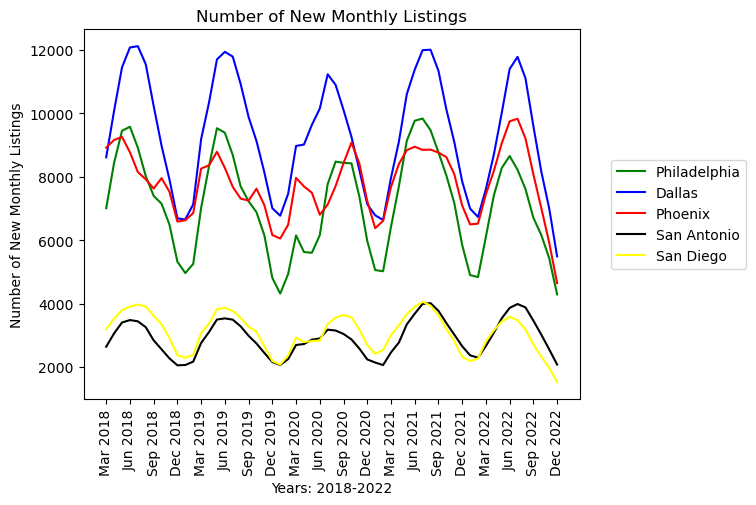

In [168]:
#Plot the Percentages of each City 
x = np.arange(0, len(philadelphia_df))
plt.plot(dates, philadelphia_df, color="green", label="Philadelphia")
plt.plot(dates, dallas_df, color="blue", label="Dallas")
plt.plot(dates, phoenix_df, color="red", label="Phoenix")
plt.plot(dates, san_antonio_df, color="black", label="San Antonio")
plt.plot(dates, san_diego_df, color="yellow", label="San Diego")
plt.title("Number of New Monthly Listings")
plt.xlabel("Years: 2018-2022")
plt.xticks(range(0, 60, 3), rotation = 90)
plt.ylabel("Number of New Monthly Listings")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))

In [169]:
plt.savefig("output_data/MontlhyNumberofNewListings.png")

<Figure size 640x480 with 0 Axes>

In [170]:
#Group the rows by yearly average
yearly_average_2018 = pd.DataFrame({
                   'Dallas, TX': [8606, 10075, 11442, 12067, 12108, 11538, 10225, 8969, 7905, 6682],
                   'Philadelphia, PA': [7002, 8434, 9443, 9570, 8909,8015, 7391, 7145, 6481, 5320],
                   'Phoenix, AZ': [8913, 9152, 9248, 8766,8143,7914, 7621, 7950, 7520, 6583],
                   'San Antonio, TX': [2639, 3060, 3402, 3479, 3439, 3255, 2839, 2556, 2270, 2053],
                   'San Diego, CA': [3193, 3527, 3791, 3902, 3969, 3907, 3615, 3345, 2911, 2374]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_average_2018.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_average_2018)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_average_2018_df = mean.astype(int)

In [171]:
#Group the rows by yearly average
yearly_average_2019 = pd.DataFrame({
                   'Dallas, TX': [6651,	7125, 9180, 10334, 11689, 11930, 11778,	10912,	9878,	9119,	8124,	7003],
                   'Philadelphia, PA': [4959, 5248, 7016, 8326, 9523, 9381, 8676, 7687, 7223, 6877, 6141, 4808],
                   'Phoenix, AZ': [6623, 6850, 8252, 8355, 8781, 8271, 7674, 7305, 7243, 7619, 7094, 6158],
                   'San Antonio, TX': [2062, 2170, 2757, 3103,	3495, 3532, 3492, 3279, 2984, 2740,	2441, 2156],
                   'San Diego, CA': [2293, 2380, 3066, 3369, 3819, 3868, 3766, 3550, 3272, 3110, 2654, 2189]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_average_2019.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_average_2019)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_average_2019_df = mean.astype(int)

In [172]:
#Group the rows by yearly average
yearly_average_2020 = pd.DataFrame({
                   'Dallas, TX': [6767,	7456, 8964,	9009, 9628,	10141, 11222, 10890, 10099,	9256, 8209,	7131],
                   'Philadelphia, PA': [4313, 4929,	6147, 5622,	5599, 6152, 7762, 8471, 8432, 8417,	7371, 5974],
                   'Phoenix, AZ': [6047, 6481, 7958, 7689, 7490, 6797, 7120, 7701, 8422, 9069, 8415, 7225],
                   'San Antonio, TX': [2063, 2250, 2694, 2723, 2860, 2899, 3176, 3149, 3041, 2870, 2582, 2239],
                   'San Diego, CA': [2077, 2360, 2931, 2787, 2817, 2834, 3350, 3557, 3636, 3571, 3179, 2696]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_average_2020.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_average_2020)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_average_2020_df = mean.astype(int)

In [173]:
#Group the rows by yearly average
yearly_average_2021 = pd.DataFrame({
                   'Dallas, TX': [6779,	6632, 7958, 9100, 10597, 11368, 11983, 11996, 11332, 10118, 9091, 7848],
                   'Philadelphia, PA': [5054, 5017, 6413, 7695, 9127, 9758, 9828, 9461, 8765, 8034, 7168, 5844],
                   'Phoenix, AZ': [6374, 6603, 7671, 8397, 8832, 8940, 8840, 8849, 8756, 8613, 8076, 7086],
                   'San Antonio, TX': [2141, 2061, 2460, 2771, 3344, 3678, 3988, 4011, 3770, 3384, 3021, 2655],
                   'San Diego, CA': [2416, 2536, 3000, 3317, 3665, 3896, 4057, 3931, 3626, 3191, 2819, 2323]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_average_2021.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_average_2021)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_average_2021_df = mean.astype(int)

In [174]:
#Group the rows by yearly average
yearly_average_2022 = pd.DataFrame({
                   'Dallas, TX': [6990,	6728, 7607, 8689, 10001, 11389, 11771, 11099, 9590, 8160, 6999, 5485],
                   'Philadelphia, PA': [4895, 4833, 6105, 7402, 8267, 8649, 8213, 7608, 6704, 6159, 5429, 4288],
                   'Phoenix, AZ': [6492, 6517, 7444, 8174, 9044, 9740, 9821, 9202, 8070, 7009, 5917, 4644],
                   'San Antonio, TX': [2368, 2292, 2663, 3079, 3532, 3861, 3984, 3878, 3460, 3020, 2556, 2078],
                   'San Diego, CA': [2183, 2265, 2807, 3153, 3432, 3579, 3475, 3183, 2717, 2323, 1974, 1522]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_average_2022.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_average_2022)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_average_2022_df = mean.astype(int)

In [175]:
combined_yearly_average_df = pd.DataFrame({
    '2018': yearly_average_2018_df,
    '2019': yearly_average_2019_df,
    '2020': yearly_average_2020_df,
    '2021': yearly_average_2021_df,
    '2022': yearly_average_2022_df
})

combined_yearly_average_df

,2018,2019,2020,2021,2022
"Dallas, TX",9961,9476,9064,9566,8709
"Philadelphia, PA",7771,7155,6599,7680,6546
"Phoenix, AZ",8181,7518,7534,8086,7672
"San Antonio, TX",2899,2850,2712,3107,3064
"San Diego, CA",3453,3111,2982,3231,2717


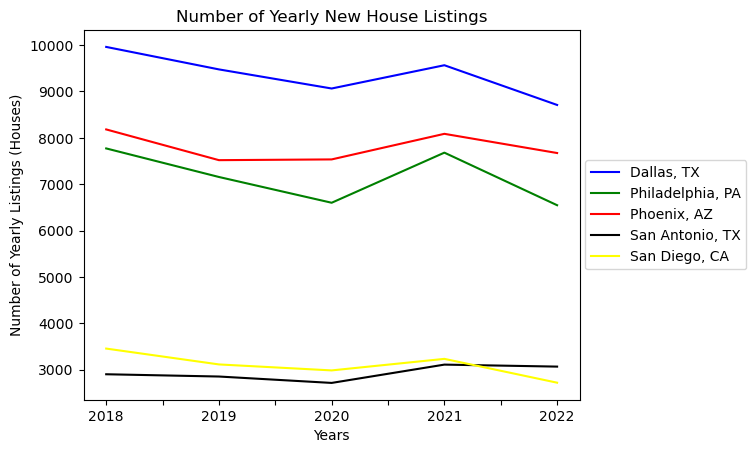

In [176]:
# Plot the Results
combined_yearly_average_df.T.plot(kind='line', color=['blue', 'green', 'red', 'black', 'yellow'], label='Dallas, TX')
plt.xlabel('Years')
plt.ylabel('Number of Yearly Listings (Houses)')
plt.title('Number of Yearly New House Listings')
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [178]:
plt.savefig("output_data/YearlyNumberofNewListings.png")

<Figure size 640x480 with 0 Axes>

In [181]:
# Load CSV Files
percentage_list_path = "Resources/PercentageofHomesSoldAboveListing.csv"
percentage_list = pd.read_csv(percentage_list_path)

#Set index to City 
percentage_list = percentage_list.set_index("City")

percentage_list.head()

,January 2018,February 2018,March 2018,April 2018,May 2018,June 2018,July 2018,August 2018,September 2018,October 2018,November 2018,December 2018,January 2019,February 2019,March 2019,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021,January 2022,February 2022,March 2022,April 2022,May 2022,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",23.25%,26.71%,30.17%,33.19%,33.70%,32.71%,29.51%,25.80%,23.24%,21.42%,20.38%,18.17%,17.24%,18.76%,20.66%,23.26%,23.57%,23.53%,22.59%,21.23%,19.07%,18.89%,17.79%,17.19%,16.32%,19.53%,21.36%,23.70%,22.72%,24.31%,27.49%,29.06%,30.68%,31.19%,32.82%,32.82%,33.18%,40.10%,48.63%,44.52%,64.92%,68.08%,66.90%,63.18%,57.18%,53.31%,53.29%,52.96%,53.34%,59.44%,69.21%,74.13%,74.31%,68.98%,56.88%,40.07%,30.30%,25.23%,22.41%
"Philadelphia, PA",17.10%,18.33%,19.75%,19.06%,22.20%,23.34%,22.27%,21.20%,20.40%,19.23%,16.70%,17.81%,16.15%,15.30%,17.27%,19.37%,24.11%,25.02%,24.97%,21.14%,21.41%,20.82%,20.32%,18.78%,17.26%,18.94%,23.64%,27.13%,26.01%,24.16%,28.33%,32.35%,36.70%,37.06%,38.25%,38.22%,37.14%,35.81%,38.95%,44.23%,49.49%,52.49%,55.38%,53.89%,50.77%,46.58%,44.91%,46.74%,44.61%,42.80%,45.44%,54.08%,59.47%,60.61%,57.99%,51.86%,45.69%,42.65%,39.77%
"Phoenix, AZ",14.79%,16.28%,16.47%,19.50%,19.28%,20.19%,17.80%,17.26%,17.74%,18.29%,16.09%,15.43%,14.47%,15.17%,15.88%,17.35%,18.96%,19.96%,20.97%,21.25%,21.95%,22.28%,20.85%,20.18%,18.33%,21.16%,26.80%,28.45%,23.26%,26.32%,31.55%,37.72%,39.49%,39.07%,38.76%,36.51%,37.91%,43.69%,53.44%,58.51%,61.11%,62.86%,60.12%,54.36%,51.69%,47.25%,46.71%,43.71%,43.20%,49.86%,56.57%,61.54%,58.25%,47.39%,32.63%,20.12%,16.84%,14.96%,13.05%
"San Antonio, TX",17.75%,21.07%,22.81%,22.43%,23.92%,24.68%,22.27%,20.29%,20.59%,18.94%,19.64%,17.19%,18.21%,17.20%,18.79%,20.95%,23.74%,24.66%,20.78%,20.76%,20.86%,20.73%,19.72%,16.56%,17.78%,16.05%,20.93%,22.82%,24.25%,26.49%,28.19%,28.16%,32.12%,30.56%,31.07%,29.46%,29.63%,32.67%,41.29%,50.30%,57.99%,61.46%,64.44%,55.64%,49.54%,46.04%,47.08%,45.10%,43.09%,48.36%,56.25%,61.95%,61.18%,56.79%,46.91%,34.57%,24.91%,23.60%,18.16%
"San Diego, CA",26.29%,32.66%,31.79%,34.56%,34.47%,32.80%,30.25%,27.65%,23.88%,21.93%,21.49%,17.07%,17.11%,19.90%,24.32%,27.57%,26.65%,27.40%,29.07%,24.93%,25.47%,26.61%,28.11%,27.64%,26.75%,31.60%,40.63%,40.76%,33.75%,36.13%,40.63%,45.68%,47.95%,49.50%,49.51%,49.08%,50.41%,57.10%,64.52%,65.48%,68.57%,69.67%,68.73%,64.71%,62.21%,59.74%,61.05%,64.35%,65.62%,71.89%,77.05%,76.08%,72.92%,63.18%,48.75%,37.74%,34.09%,33.15%,29.29%


In [182]:
dates= percentage_list.columns

In [183]:
philadelphia_df = percentage_list.loc["Philadelphia, PA"]
dallas_df = percentage_list.loc["Dallas, TX"]
phoenix_df = percentage_list.loc["Phoenix, AZ"]
san_antonio_df = percentage_list.loc["San Antonio, TX"]
san_diego_df = percentage_list.loc["San Diego, CA"]

In [184]:
yearly_percentage_2018 = pd.DataFrame({
                   'Dallas, TX': [0.2325, 0.2671, 0.3017, 0.3319, 0.337, 0.3271, 0.2951, 0.258, 0.2324, 0.2142, 0.2038, 0.1817],
                   'Philadelphia, PA': [0.171, 0.1833, 0.1975, 0.1906, 0.222, 0.2334, 0.2227, 0.212, 0.204, 0.1923, 0.167, 0.1781],
                   'Phoenix, AZ': [0.1479, 0.1628, 0.1647, 0.195, 0.1928, 0.2019, 0.178, 0.1726, 0.1774, 0.1829, 0.1609, 0.1543],
                   'San Antonio, TX': [0.1775, 0.2107, 0.2281, 0.2243, 0.2392, 0.2468, 0.2227, 0.2029, 0.2059, 0.1894, 0.1964, 0.1719],
                   'San Diego, CA': [0.2629, 0.3266, 0.3179, 0.3456, 0.3447, 0.328, 0.3025, 0.2765, 0.2388, 0.2193, 0.2149, 0.1707]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_percentage_2018.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_percentage_2018)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_percentage_2018_df = mean

print(yearly_percentage_2018_df)

Dallas, TX          0.265208
Philadelphia, PA    0.197825
Phoenix, AZ         0.174267
San Antonio, TX     0.209650
San Diego, CA       0.279033
dtype: float64


In [185]:
#Group the rows by yearly average
yearly_percentage_2019 = pd.DataFrame({
                   'Dallas, TX': [0.1724, 0.1876, 0.2066, 0.2326, 0.2357, 0.2353, 0.2259, 0.2123, 0.1907, 0.1889, 0.1779, 0.1719],
                   'Philadelphia, PA': [0.1615, 0.153, 0.1727, 0.1937, 0.2411, 0.2502, 0.2497, 0.2114, 0.2141, 0.2082, 0.2032, 0.1878],
                   'Phoenix, AZ': [0.1447, 0.1517, 0.1588, 0.1735, 0.1896, 0.1996, 0.2097, 0.2125, 0.2195, 0.2228, 0.2085, 0.2018],
                   'San Antonio, TX': [0.1821, 0.172, 0.1879, 0.2095, 0.2374, 0.2466, 0.2078, 0.2076, 0.2086, 0.2073, 0.1972, 0.1656],
                   'San Diego, CA': [0.1711, 0.199, 0.2432, 0.2757, 0.2665, 0.274, 0.2907, 0.2493, 0.2547, 0.2661, 0.2811, 0.2764]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_percentage_2019.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_percentage_2019)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_percentage_2019_df = mean

print(yearly_percentage_2019_df)

Dallas, TX          0.203150
Philadelphia, PA    0.203883
Phoenix, AZ         0.191058
San Antonio, TX     0.202467
San Diego, CA       0.253983
dtype: float64


In [186]:
#Group the rows by yearly average
yearly_percentage_2020 = pd.DataFrame({
                   'Dallas, TX': [0.1632,	0.1953,	0.2136,	0.2370,	0.2272,	0.2431,	0.2749,	0.2906,	0.3068,	0.3119,	0.3282,	0.3282],
                   'Philadelphia, PA': [0.1726,	0.1894,	0.2364,	0.2713,	0.2601,	0.2416,	0.2833,	0.3235,	0.3670,	0.3706,	0.3825,	0.3822],
                   'Phoenix, AZ': [0.1833,	0.2116,	0.2680,	0.2845,	0.2326,	0.2632,	0.3155,	0.3772,	0.3949,	0.3907,	0.3876,	0.3651],
                   'San Antonio, TX': [0.1778,	0.1605,	0.2093,	0.2282,	0.2425,	0.2649,	0.2819,	0.2816,	0.3212,	0.3056,	0.3107,	0.2946],
                   'San Diego, CA': [0.2675,	0.3160,	0.4063,	0.4076,	0.3375,	0.3613,	0.4063,	0.4568,	0.4795,	0.4950,	0.4951,	0.4908]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_percentage_2020.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_percentage_2020)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_percentage_2020_df = mean

print(yearly_percentage_2020_df)

Dallas, TX          0.260000
Philadelphia, PA    0.290042
Phoenix, AZ         0.306183
San Antonio, TX     0.256567
San Diego, CA       0.409975
dtype: float64


In [187]:
#Group the rows by yearly average
yearly_percentage_2021 = pd.DataFrame({
                   'Dallas, TX': [0.3318, 0.4010,	0.4863,	0.4452,	0.6492,	0.6808,	0.6690,	0.6318,	0.5718,	0.5331,	0.5329,	0.5296],
                   'Philadelphia, PA': [0.3714,	0.3581,	0.3895,	0.4423,	0.4949,	0.5249,	0.5538,	0.5389,	0.5077,	0.4658,	0.4491,	0.4674],
                   'Phoenix, AZ': [0.3791, 0.4369,	0.5344,	0.5851,	0.6111,	0.6286,	0.6012,	0.5436,	0.5169,	0.4725,	0.4671,	0.4371],
                   'San Antonio, TX': [0.2963, 0.3267,	0.4129,	0.5030,	0.5799,	0.6146,	0.6444,	0.5564,	0.4954,	0.4604,	0.4708,	0.4510],
                   'San Diego, CA': [0.5041, 0.5710, 0.6452, 0.6548,	0.6857,	0.6967,	0.6873,	0.6471,	0.6221,	0.5974,	0.6105,	0.6435]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_percentage_2021.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_percentage_2021)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_percentage_2021_df = mean

print(yearly_percentage_2021_df)

Dallas, TX          0.538542
Philadelphia, PA    0.463650
Phoenix, AZ         0.517800
San Antonio, TX     0.484317
San Diego, CA       0.630450
dtype: float64


In [188]:
#Group the rows by yearly average
yearly_percentage_2022 = pd.DataFrame({
                   'Dallas, TX': [0.3334, 0.5944, 0.6921, 0.7413, 0.7431, 0.6898, 0.5688, 0.4007, 0.3030, 0.2523, 0.2241],
                   'Philadelphia, PA': [0.4461, 0.4280, 0.4544, 0.5408, 0.5947, 0.6061, 0.5799, 0.5186, 0.4569, 0.4265, 0.3977],
                   'Phoenix, AZ': [0.4320, 0.4986, 0.5657, 0.6154, 0.5825, 0.4739, 0.3263, 0.2012, 0.1684, 0.1496, 0.1305],
                   'San Antonio, TX': [0.4309, 0.4836, 0.5625, 0.6195, 0.6118, 0.5679, 0.4691, 0.3457, 0.2491, 0.2360, 0.1816],
                   'San Diego, CA': [0.6562, 0.7189, 0.7705, 0.7608, 0.7292, 0.6318, 0.4875, 0.3774, 0.3409, 0.3315, 0.2929]
                   })

# Add up all the values in each coloumn
combined_rows = yearly_percentage_2022.sum()

# Calculate the average of the combined values in each column
mean = combined_rows/len(yearly_percentage_2022)

# Round the results to the nearest whole number and create Yearly DataFrame variable 
yearly_percentage_2022_df = mean

print(yearly_percentage_2022_df)

Dallas, TX          0.503909
Philadelphia, PA    0.495427
Phoenix, AZ         0.376736
San Antonio, TX     0.432518
San Diego, CA       0.554327
dtype: float64


In [189]:
combined_yearly_percentage_df = pd.DataFrame({
    '2018': yearly_percentage_2018_df,
    '2019': yearly_percentage_2019_df,
    '2020': yearly_percentage_2020_df,
    '2021': yearly_percentage_2021_df,
    '2022': yearly_percentage_2022_df
})

combined_yearly_percentage_df

,2018,2019,2020,2021,2022
"Dallas, TX",0.265208,0.203150,0.260000,0.538542,0.503909
"Philadelphia, PA",0.197825,0.203883,0.290042,0.463650,0.495427
"Phoenix, AZ",0.174267,0.191058,0.306183,0.517800,0.376736
"San Antonio, TX",0.209650,0.202467,0.256567,0.484317,0.432518
"San Diego, CA",0.279033,0.253983,0.409975,0.630450,0.554327


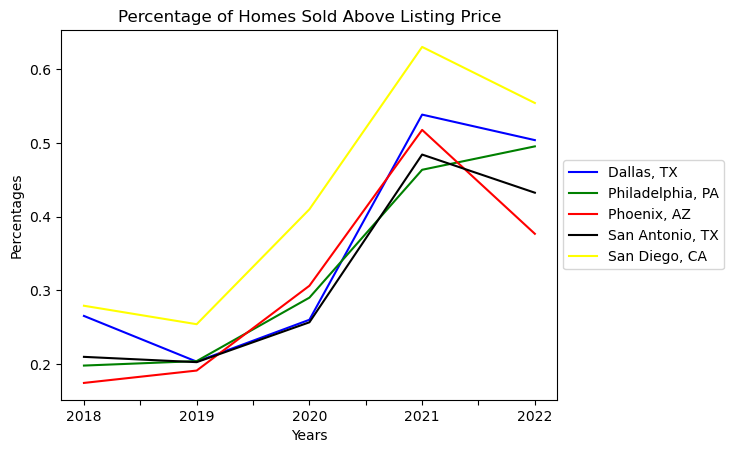

In [190]:
# Plot the Results
combined_yearly_percentage_df.T.plot(kind='line', color=['blue', 'green', 'red', 'black', 'yellow'], label='Dallas, TX')
plt.xlabel('Years')
plt.ylabel('Percentages')
plt.title('Percentage of Homes Sold Above Listing Price')
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [191]:
plt.savefig("output_data/YearlyNumberofNewListings.png")

<Figure size 640x480 with 0 Axes>

In [33]:
#Price Cuts

In [34]:
#create reference to csv file
#read the csv into a Pandas DataFrame

properties = pd.read_csv("Resources/AverageNumberofPropertieswithPriceCut.csv")

#print csv
properties.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,7690.000000,8390.000000,9190.000000,9633.333333,9766.666667,9466.666667,9166.666667,9000.000000,8466.666667,7500.000000,6833.333333,6733.333333,7533.333333,8366.666667,9333.333333,9833.333333,9966.666667,9633.333333,9300.000000,8666.666667,8000.000000,7000.000000,6666.666667,7333.333333,8500.000000,8833.333333,8833.333333,9000.000000,9666.666667,10000.000000,10000.000000,10000.000000,10000.0,9983.333333,9983.333333,9983.333333,10000.000000,10000.333333,10333.666667,10666.666667,10699.666667,10366.333333,10033.333333,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10033.333333,11033.333333,12700.000000,14333.333333,14800.000000,13466.666667,11866.666667,10433.333333,10100.000000,10033.333333
1,394913,1,"New York, NY",msa,NY,15667.000000,17000.666667,18663.833333,19333.833333,18333.500000,16670.000000,16666.666667,16666.666667,16667.000000,15333.666667,15000.333333,15000.000000,15333.333333,16667.000000,18000.333333,19000.333333,17966.666667,16633.333333,15633.333333,15366.666667,15366.666667,15033.333333,15000.000000,15333.333333,15666.666667,15666.666667,15333.333333,16333.000000,17999.666667,19666.333333,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20308.333333,21975.000000,23641.666667,25000.000000,24999.666667,24333.000000,23999.666667,22500.0,21500.0,20166.666667,20300.000000,22000.000000,24000.000000,25366.666667,25366.666667,25366.666667,25366.666667,25000.000000,24633.666667,24333.666667,23787.333333,22153.666667
2,753899,2,"Los Angeles, CA",msa,CA,21666.666667,22000.000000,23333.333333,23000.000000,21666.666667,20333.333333,20000.000000,20000.000000,20000.000000,19752.000000,19752.000000,19752.000000,20000.000000,20333.333333,20366.666667,21033.333333,21366.666667,21333.333333,20966.666667,20633.333333,21966.666667,21666.666667,22990.166667,24990.166667,27758.833333,26435.333333,24101.666667,23333.000000,26333.000000,30000.000000,31333.333333,31333.333333,30000.0,29700.000000,33033.333333,38033.333333,43666.666667,47000.000000,48333.333333,47998.333333,44665.000000,38331.666667,33333.333333,30000.0,30000.0,29166.666667,32633.333333,39300.000000,46767.000000,48300.333333,45007.000000,41706.666667,38373.333333,35000.000000,31666.666667,30000.000000,30000.000000,28666.666667
3,394463,3,"Chicago, IL",msa,IL,7833.333333,9200.000000,9833.333333,10000.000000,9700.000000,8866.666667,8200.000000,7333.333333,6666.666667,5666.666667,5500.000000,6083.333333,7450.000000,8783.333333,9700.000000,10000.000000,9700.000000,8866.666667,8200.000000,7166.666667,6366.666667,5366.666667,5333.333333,6300.000000,7633.333333,8000.000000,7833.333333,8133.333333,9133.333333,9966.666667,10000.000000,10000.000000,9700.0,8867.000000,8867.000000,9167.000000,10000.000000,10033.333333,10066.666667,10066.666667,10033.333333,10000.000000,10000.000000,10000.0,10000.0,9666.666667,9391.666667,9391.666667,9725.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9666.666667
4,394514,4,"Dallas, TX",msa,TX,8930.166667,9513.500000,9870.166667,9603.333333,9003.333333,7700.000000,6666.666667,6166.666667,6129.333333,5829.333333,5662.666667,5700.000000,6300.000000,6800.000000,7333.333333,7466.666667,7300.000000,6766.666667,6300.000000,5666.666667,5500.000000,520

In [35]:
#Isolate 5 cities
properties_cut = properties[(properties['RegionName'] == 'Philadelphia, PA') | (properties['RegionName'] == 'Phoenix, AZ') | (properties['RegionName'] == 'San Antonio, TX') \
                               | (properties['RegionName'] == 'San Diego, CA') | (properties['RegionName'] == 'Dallas, TX')]

properties_cut

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
4,394514,4,"Dallas, TX",msa,TX,8930.166667,9513.500000,9870.166667,9603.333333,9003.333333,7700.000000,6666.666667,6166.666667,6129.333333,5829.333333,5662.666667,5700.000000,6300.000000,6800.000000,7333.333333,7466.666667,7300.000000,6766.666667,6300.000000,5666.666667,5500.000000,5200.000000,5200.000000,5400.000000,6066.666667,6299.833333,6266.500000,6433.166667,7000.000000,7666.666667,8200.000000,9000.000000,9665.000000,9831.666667,9865.000000,9866.666667,10000.000000,10000.333333,11000.333333,11333.666667,11366.666667,10367.666667,10034.333333,10001.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10333.333333,11666.666667,13333.333333,14333.333333,13033.333333,11366.666667,10033.333333,10000.000000,10000.000000
8,394974,8,"Philadelphia, PA",msa,PA,6752.333333,7083.333333,8300.333333,9267.000000,9667.000000,9033.333333,9000.000000,9000.000000,9000.000000,8033.333333,7500.000000,7166.666667,7333.333333,8133.333333,9133.333333,9966.666667,9966.666667,9633.333333,9609.000000,9555.333333,9222.000000,8246.333333,8000.000000,8666.666667,9633.333333,8966.666667,8466.666667,8500.000000,9500.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
10,394976,10,"Phoenix, AZ",msa,AZ,5000.333333,5033.666667,5033.666667,5033.333333,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4966.666667,4966.666667,4966.666667,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,6000.000000,7366.666667,7366.666667,6366.666667,5666.666667,6666.666667,8000.000000,9000.000000,9633.333333,9933.333333,9898.333333,9931.666667,9965.000000,10166.666667,11833.333333,13500.000000,15000.000000,14000.000000,12666.666667,11000.333333,10716.500000,10383.166667,10382.833333,10000.000000,10000.000000,10033.333333,11366.666667,13033.333333,14333.333333,14660.833333,13327.500000,11994.166667,10666.666667,10333.333333,10333.333333
17,395056,17,"San Diego, CA",msa,CA,17716.666667,18650.000000,18933.333333,19566.833333,18300.166667,16670.166667,15336.666667,15003.666667,15000.333333,15000.333333,15000.000000,14999.666667,14999.666667,15333.000000,15666.666667,16316.666667,16650.000000,16983.333333,16366.666667,17333.666667,18000.333333,19193.500000,18893.166667,19226.500000,19666.666667,18666.666667,18666.666667,18666.666667,20333.333333,20666.666667,22300.333333,23300.333333,22967.000000,21333.333333,21666.666667,25000.000000,28333.333333,30033.333333,30366.666667,30366.666667,28700.000000,27033.333333,25366.666667,25333.333333,24966.666667,24633.500000,26300.166667,33333.500000,40500.000000,43833.333333,42133.333333,38633.333333,35300.000000,30333.333333,27333.333333,26000.000000,25666.666667,25300.000000
24,395055,24,"San Antonio, TX",msa,TX,5067.000000,5233.333333,5420.833333,5420.833333,5554.166667,5466.666667,5433.333333,5133.333333,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5033.333333,5066.666667,5100.000000,5100.000000,5066.666667,5033

In [36]:
#remove unwanted columns
properties_p_cut = properties_cut.loc[:,properties_cut.columns != 'RegionID']
properties_pr_cut = properties_p_cut.loc[:,properties_p_cut.columns != 'SizeRank']
properties_pri_cut = properties_pr_cut.loc[:,properties_pr_cut.columns != 'RegionType']
properties_pric_cut = properties_pri_cut.loc[:,properties_pri_cut.columns != 'StateName']
properties_pric_cut

,RegionName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
4,"Dallas, TX",8930.166667,9513.500000,9870.166667,9603.333333,9003.333333,7700.000000,6666.666667,6166.666667,6129.333333,5829.333333,5662.666667,5700.000000,6300.000000,6800.000000,7333.333333,7466.666667,7300.000000,6766.666667,6300.000000,5666.666667,5500.000000,5200.000000,5200.000000,5400.000000,6066.666667,6299.833333,6266.500000,6433.166667,7000.000000,7666.666667,8200.000000,9000.000000,9665.000000,9831.666667,9865.000000,9866.666667,10000.000000,10000.333333,11000.333333,11333.666667,11366.666667,10367.666667,10034.333333,10001.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10333.333333,11666.666667,13333.333333,14333.333333,13033.333333,11366.666667,10033.333333,10000.000000,10000.000000
8,"Philadelphia, PA",6752.333333,7083.333333,8300.333333,9267.000000,9667.000000,9033.333333,9000.000000,9000.000000,9000.000000,8033.333333,7500.000000,7166.666667,7333.333333,8133.333333,9133.333333,9966.666667,9966.666667,9633.333333,9609.000000,9555.333333,9222.000000,8246.333333,8000.000000,8666.666667,9633.333333,8966.666667,8466.666667,8500.000000,9500.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
10,"Phoenix, AZ",5000.333333,5033.666667,5033.666667,5033.333333,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4966.666667,4966.666667,4966.666667,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,6000.000000,7366.666667,7366.666667,6366.666667,5666.666667,6666.666667,8000.000000,9000.000000,9633.333333,9933.333333,9898.333333,9931.666667,9965.000000,10166.666667,11833.333333,13500.000000,15000.000000,14000.000000,12666.666667,11000.333333,10716.500000,10383.166667,10382.833333,10000.000000,10000.000000,10033.333333,11366.666667,13033.333333,14333.333333,14660.833333,13327.500000,11994.166667,10666.666667,10333.333333,10333.333333
17,"San Diego, CA",17716.666667,18650.000000,18933.333333,19566.833333,18300.166667,16670.166667,15336.666667,15003.666667,15000.333333,15000.333333,15000.000000,14999.666667,14999.666667,15333.000000,15666.666667,16316.666667,16650.000000,16983.333333,16366.666667,17333.666667,18000.333333,19193.500000,18893.166667,19226.500000,19666.666667,18666.666667,18666.666667,18666.666667,20333.333333,20666.666667,22300.333333,23300.333333,22967.000000,21333.333333,21666.666667,25000.000000,28333.333333,30033.333333,30366.666667,30366.666667,28700.000000,27033.333333,25366.666667,25333.333333,24966.666667,24633.500000,26300.166667,33333.500000,40500.000000,43833.333333,42133.333333,38633.333333,35300.000000,30333.333333,27333.333333,26000.000000,25666.666667,25300.000000
24,"San Antonio, TX",5067.000000,5233.333333,5420.833333,5420.833333,5554.166667,5466.666667,5433.333333,5133.333333,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5033.333333,5066.666667,5100.000000,5100.000000,5066.666667,5033.333333,5000.000000,5000.000000,5000.000000,5000.000000,5033.333333,5200.000000,5200.333333,5200.333333,5200.333333,5500.1

In [37]:
properties_pric_cut.set_index("RegionName", inplace=True)
properties_pric_cut

,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",8930.166667,9513.500000,9870.166667,9603.333333,9003.333333,7700.000000,6666.666667,6166.666667,6129.333333,5829.333333,5662.666667,5700.000000,6300.000000,6800.000000,7333.333333,7466.666667,7300.000000,6766.666667,6300.000000,5666.666667,5500.000000,5200.000000,5200.000000,5400.000000,6066.666667,6299.833333,6266.500000,6433.166667,7000.000000,7666.666667,8200.000000,9000.000000,9665.000000,9831.666667,9865.000000,9866.666667,10000.000000,10000.333333,11000.333333,11333.666667,11366.666667,10367.666667,10034.333333,10001.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10333.333333,11666.666667,13333.333333,14333.333333,13033.333333,11366.666667,10033.333333,10000.000000,10000.000000
"Philadelphia, PA",6752.333333,7083.333333,8300.333333,9267.000000,9667.000000,9033.333333,9000.000000,9000.000000,9000.000000,8033.333333,7500.000000,7166.666667,7333.333333,8133.333333,9133.333333,9966.666667,9966.666667,9633.333333,9609.000000,9555.333333,9222.000000,8246.333333,8000.000000,8666.666667,9633.333333,8966.666667,8466.666667,8500.000000,9500.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
"Phoenix, AZ",5000.333333,5033.666667,5033.666667,5033.333333,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4966.666667,4966.666667,4966.666667,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,6000.000000,7366.666667,7366.666667,6366.666667,5666.666667,6666.666667,8000.000000,9000.000000,9633.333333,9933.333333,9898.333333,9931.666667,9965.000000,10166.666667,11833.333333,13500.000000,15000.000000,14000.000000,12666.666667,11000.333333,10716.500000,10383.166667,10382.833333,10000.000000,10000.000000,10033.333333,11366.666667,13033.333333,14333.333333,14660.833333,13327.500000,11994.166667,10666.666667,10333.333333,10333.333333
"San Diego, CA",17716.666667,18650.000000,18933.333333,19566.833333,18300.166667,16670.166667,15336.666667,15003.666667,15000.333333,15000.333333,15000.000000,14999.666667,14999.666667,15333.000000,15666.666667,16316.666667,16650.000000,16983.333333,16366.666667,17333.666667,18000.333333,19193.500000,18893.166667,19226.500000,19666.666667,18666.666667,18666.666667,18666.666667,20333.333333,20666.666667,22300.333333,23300.333333,22967.000000,21333.333333,21666.666667,25000.000000,28333.333333,30033.333333,30366.666667,30366.666667,28700.000000,27033.333333,25366.666667,25333.333333,24966.666667,24633.500000,26300.166667,33333.500000,40500.000000,43833.333333,42133.333333,38633.333333,35300.000000,30333.333333,27333.333333,26000.000000,25666.666667,25300.000000
"San Antonio, TX",5067.000000,5233.333333,5420.833333,5420.833333,5554.166667,5466.666667,5433.333333,5133.333333,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5033.333333,5066.666667,5100.000000,5100.000000,5066.666667,5033.333333,5000.000000,5000.000000,5000.000000,5000.000000,5033.333333,5200.0000

In [38]:
properties_price_cut = properties_pric_cut.transpose()
properties_price_cut

RegionName,"Dallas, TX","Philadelphia, PA","Phoenix, AZ","San Diego, CA","San Antonio, TX"
2018-03-31,8930.166667,6752.333333,5000.333333,17716.666667,5067.000000
2018-04-30,9513.500000,7083.333333,5033.666667,18650.000000,5233.333333
2018-05-31,9870.166667,8300.333333,5033.666667,18933.333333,5420.833333
2018-06-30,9603.333333,9267.000000,5033.333333,19566.833333,5420.833333
2018-07-31,9003.333333,9667.000000,5000.000000,18300.166667,5554.166667
2018-08-31,7700.000000,9033.333333,5000.000000,16670.166667,5466.666667
2018-09-30,6666.666667,9000.000000,5000.000000,15336.666667,5433.333333
2018-10-31,6166.666667,9000.000000,5000.000000,15003.666667,5133.333333
2018-11-30,6129.333333,9000.000000,5000.000000,15000.333333,5000.000000
2018-12-31,5829.333333,8033.333333,4966.666667,15000.333333,5000.000000


In [39]:
#rename columns
properties_price_cut.rename(index = {'2018-03-31':'2018 March',
                                  '2018-04-30':'2018 April',
                                  '2018-05-31':'2018 May',
                                  '2018-06-30':'2018 June',
                                  '2018-07-31':'2018 July',
                                  '2018-08-31':'2018 Aug',
                                  '2018-09-30':'2018 Sept',
                                  '2018-10-31':'2018 Oct',
                                  '2018-11-30':'2018 Nov',
                                  '2018-12-31':'2018 Dec',
                                  '2019-01-31':'2019 Jan',
                                  '2019-02-28':'2019 Feb',
                                  '2019-03-31':'2019 March',
                                  '2019-04-30':'2019 April',
                                  '2019-05-31':'2019 May',
                                  '2019-06-30':'2019 June',
                                  '2019-07-31':'2019 July',
                                  '2019-08-31':'2019 Aug',
                                  '2019-09-30':'2019 Sept',
                                  '2019-10-31':'2019 Oct',
                                  '2019-11-30':'2019 Nov',
                                  '2019-12-31':'2019 Dec',
                                  '2020-01-31':'2020 Jan',
                                  '2020-02-29':'2020 Feb',
                                  '2020-03-31':'2020 March',
                                  '2020-04-30':'2020 April',
                                  '2020-05-31':'2020 May',
                                  '2020-06-30':'2020 June',
                                  '2020-07-31':'2020 July',
                                  '2020-07-31':'2020 Aug',
                                  '2020-09-30':'2020 Sept',
                                  '2020-10-31':'2020 Oct',
                                  '2020-11-30':'2020 Nov',
                                  '2020-12-31':'2020 Dec',
                                  '2021-01-31':'2021 Jan',
                                  '2021-02-28':'2021 Feb',
                                  '2021-03-31':'2021 March',
                                  '2021-04-30':'2021 April',
                                  '2021-05-31':'2021 May',
                                  '2021-06-30':'2021 June',
                                  '2021-07-31':'2021 July',
                                  '2021-07-31':'2021 Aug',
                                  '2021-09-30':'2021 Sept',
                                  '2021-10-31':'2021 Oct',
                                  '2021-11-30':'2021 Nov',
                                  '2021-12-31':'2021 Dec',
                                  '2022-01-31':'2022 Jan',
                                  '2022-02-28':'2022 Feb',
                                  '2022-03-31':'2022 March',
                                  '2022-04-30':'2022 April',
                                  '2022-05-31':'2022 May',
                                  '2022-06-30':'2022 June',
                                  '2022-07-31':'2022 July',
                                  '2022-08-31':'2022 Aug',
                                  '2022-09-30':'2022 Sept',
                                  '2022-10-31':'2022 Oct',
                                  '2022-11-30':'2022 Nov',
                                  '2022-12-31':'2022 Dec'}, inplace=True)

In [40]:
properties_price_cut.head()

RegionName,"Dallas, TX","Philadelphia, PA","Phoenix, AZ","San Diego, CA","San Antonio, TX"
2018 March,8930.166667,6752.333333,5000.333333,17716.666667,5067.000000
2018 April,9513.500000,7083.333333,5033.666667,18650.000000,5233.333333
2018 May,9870.166667,8300.333333,5033.666667,18933.333333,5420.833333
2018 June,9603.333333,9267.000000,5033.333333,19566.833333,5420.833333
2018 July,9003.333333,9667.000000,5000.000000,18300.166667,5554.166667


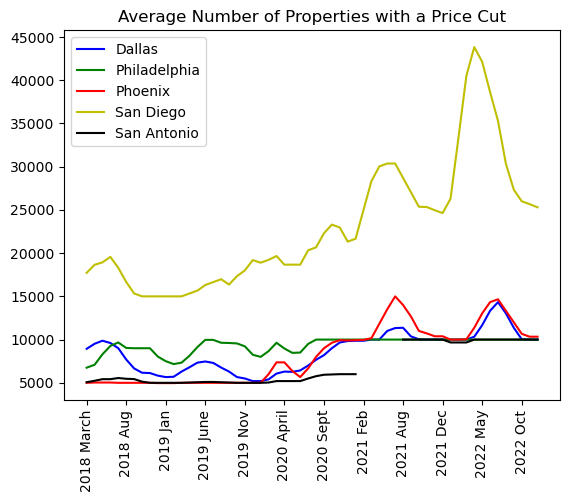

In [41]:
plt.plot(properties_price_cut["Dallas, TX"], 'b-', label = "Dallas")
plt.plot(properties_price_cut["Philadelphia, PA"], 'g-', label = "Philadelphia")
plt.plot(properties_price_cut["Phoenix, AZ"], 'r-', label = "Phoenix")
plt.plot(properties_price_cut["San Diego, CA"], 'y-', label = "San Diego")
plt.plot(properties_price_cut["San Antonio, TX"], 'k-', label = "San Antonio")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.title("Average Number of Properties with a Price Cut")
plt.legend()

In [42]:
#Days to Pending

In [43]:
#create reference to csv file
days_to_pend = pd.read_csv("Resources/AverageDaystoPending.csv")
#read the csv into a Pandas DataFrame

#print csv
days_to_pend.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,31.0,21.0,19.0,18.0,20.0,22.0,26.0,29.0,33.0,38.0,44.0,41.0,33.0,23.0,20.0,20.0,21.0,24.0,26.0,28.0,31.0,36.0,40.0,36.0,26.0,19.0,18.0,19.0,16.0,14.0,14.0,13.0,13.0,14.0,16.0,14.0,11.0,8.0,7.0,7.0,7.0,8.0,9.0,10.0,10.0,11.0,11.0,10.0,7.0,6.0,6.0,7.0,9.0,12.0,15.0,17.0,19.0,23.0
1,394913,1,"New York, NY",msa,NY,58.0,43.0,38.0,40.0,43.0,48.0,53.0,55.0,58.0,62.0,72.0,72.0,64.0,51.0,45.0,45.0,49.0,55.0,59.0,59.0,59.0,64.0,74.0,73.0,61.0,49.0,47.0,44.0,38.0,30.0,30.0,31.0,33.0,37.0,47.0,47.0,42.0,30.0,26.0,26.0,28.0,30.0,33.0,34.0,38.0,39.0,43.0,38.0,32.0,23.0,21.0,22.0,25.0,29.0,33.0,34.0,35.0,38.0
2,753899,2,"Los Angeles, CA",msa,CA,17.0,14.0,15.0,15.0,17.0,19.0,22.0,24.0,27.0,31.0,36.0,35.0,29.0,22.0,20.0,20.0,21.0,22.0,23.0,23.0,24.0,27.0,26.0,22.0,16.0,15.0,15.0,16.0,15.0,14.0,13.0,13.0,13.0,13.0,13.0,12.0,10.0,10.0,10.0,10.0,10.0,11.0,12.0,12.0,12.0,12.0,12.0,11.0,10.0,10.0,10.0,11.0,14.0,17.0,20.0,22.0,23.0,27.0
3,394463,3,"Chicago, IL",msa,IL,32.0,17.0,15.0,16.0,18.0,21.0,25.0,30.0,35.0,44.0,53.0,47.0,35.0,20.0,18.0,18.0,21.0,24.0,28.0,33.0,38.0,46.0,54.0,47.0,34.0,22.0,20.0,19.0,16.0,14.0,13.0,13.0,14.0,18.0,20.0,18.0,12.0,8.0,6.0,6.0,7.0,9.0,11.0,12.0,14.0,17.0,17.0,14.0,9.0,6.0,6.0,6.0,8.0,10.0,13.0,15.0,18.0,23.0
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,25.0,28.0,31.0,35.0,38.0,42.0,39.0,35.0,28.0,26.0,26.0,27.0,30.0,33.0,36.0,39.0,42.0,45.0,42.0,35.0,28.0,26.0,26.0,25.0,24.0,23.0,22.0,22.0,22.0,22.0,20.0,17.0,15.0,13.0,13.0,13.0,14.0,16.0,17.0,17.0,17.0,16.0,15.0,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0


In [44]:
#narrow down results to 5 cities
days_to_pending = days_to_pend[(days_to_pend['RegionName'] == 'Philadelphia, PA') | (days_to_pend['RegionName'] == 'Phoenix, AZ') | (days_to_pend['RegionName'] == 'San Antonio, TX') \
                               | (days_to_pend['RegionName'] == 'San Diego, CA') | (days_to_pend['RegionName'] == 'Dallas, TX')]

days_to_pending

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,25.0,28.0,31.0,35.0,38.0,42.0,39.0,35.0,28.0,26.0,26.0,27.0,30.0,33.0,36.0,39.0,42.0,45.0,42.0,35.0,28.0,26.0,26.0,25.0,24.0,23.0,22.0,22.0,22.0,22.0,20.0,17.0,15.0,13.0,13.0,13.0,14.0,16.0,17.0,17.0,17.0,16.0,15.0,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0
8,394974,8,"Philadelphia, PA",msa,PA,46.0,33.0,27.0,29.0,29.0,29.0,27.0,29.0,32.0,37.0,43.0,40.0,31.0,20.0,16.0,17.0,19.0,22.0,23.0,23.0,25.0,32.0,38.0,34.0,23.0,16.0,16.0,15.0,11.0,9.0,12.0,12.0,13.0,11.0,12.0,11.0,8.0,7.0,6.0,6.0,7.0,9.0,10.0,10.0,10.0,11.0,11.0,10.0,8.0,7.0,7.0,7.0,9.0,10.0,11.0,11.0,12.0,15.0
10,394976,10,"Phoenix, AZ",msa,AZ,29.0,25.0,25.0,25.0,26.0,26.0,25.0,25.0,29.0,34.0,38.0,35.0,32.0,27.0,27.0,25.0,25.0,23.0,21.0,20.0,21.0,24.0,25.0,23.0,17.0,15.0,17.0,19.0,17.0,13.0,10.0,10.0,11.0,14.0,13.0,11.0,8.0,7.0,6.0,7.0,8.0,9.0,10.0,10.0,12.0,13.0,13.0,11.0,8.0,7.0,8.0,10.0,15.0,21.0,28.0,35.0,40.0,46.0
17,395056,17,"San Diego, CA",msa,CA,16.0,14.0,14.0,16.0,23.0,25.0,28.0,28.0,32.0,37.0,40.0,38.0,31.0,24.0,21.0,20.0,21.0,23.0,24.0,25.0,25.0,27.0,25.0,21.0,14.0,17.0,17.0,18.0,12.0,10.0,8.0,8.0,8.0,9.0,9.0,8.0,7.0,7.0,7.0,7.0,7.0,8.0,9.0,9.0,9.0,9.0,8.0,7.0,7.0,7.0,7.0,9.0,12.0,16.0,19.0,21.0,21.0,25.0
24,395055,24,"San Antonio, TX",msa,TX,42.0,32.0,30.0,30.0,31.0,32.0,35.0,39.0,42.0,43.0,46.0,45.0,42.0,35.0,32.0,32.0,33.0,35.0,39.0,42.0,45.0,49.0,54.0,52.0,44.0,35.0,32.0,31.0,29.0,27.0,26.0,25.0,26.0,26.0,25.0,19.0,11.0,6.0,5.0,5.0,6.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0,7.0,6.0,6.0,6.0,8.0,11.0,15.0,19.0,23.0,29.0


In [45]:
#remove unwanted columns
days_to_pendin = days_to_pending.loc[:,days_to_pending.columns != 'RegionID']
days_to_pendi = days_to_pendin.loc[:,days_to_pendin.columns != 'SizeRank']
days_to_pend = days_to_pendi.loc[:,days_to_pendi.columns != 'RegionType']
days_to_pen = days_to_pend.loc[:,days_to_pend.columns != 'StateName']
days_to_pen


,RegionName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
4,"Dallas, TX",27.0,21.0,20.0,20.0,22.0,25.0,28.0,31.0,35.0,38.0,42.0,39.0,35.0,28.0,26.0,26.0,27.0,30.0,33.0,36.0,39.0,42.0,45.0,42.0,35.0,28.0,26.0,26.0,25.0,24.0,23.0,22.0,22.0,22.0,22.0,20.0,17.0,15.0,13.0,13.0,13.0,14.0,16.0,17.0,17.0,17.0,16.0,15.0,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0
8,"Philadelphia, PA",46.0,33.0,27.0,29.0,29.0,29.0,27.0,29.0,32.0,37.0,43.0,40.0,31.0,20.0,16.0,17.0,19.0,22.0,23.0,23.0,25.0,32.0,38.0,34.0,23.0,16.0,16.0,15.0,11.0,9.0,12.0,12.0,13.0,11.0,12.0,11.0,8.0,7.0,6.0,6.0,7.0,9.0,10.0,10.0,10.0,11.0,11.0,10.0,8.0,7.0,7.0,7.0,9.0,10.0,11.0,11.0,12.0,15.0
10,"Phoenix, AZ",29.0,25.0,25.0,25.0,26.0,26.0,25.0,25.0,29.0,34.0,38.0,35.0,32.0,27.0,27.0,25.0,25.0,23.0,21.0,20.0,21.0,24.0,25.0,23.0,17.0,15.0,17.0,19.0,17.0,13.0,10.0,10.0,11.0,14.0,13.0,11.0,8.0,7.0,6.0,7.0,8.0,9.0,10.0,10.0,12.0,13.0,13.0,11.0,8.0,7.0,8.0,10.0,15.0,21.0,28.0,35.0,40.0,46.0
17,"San Diego, CA",16.0,14.0,14.0,16.0,23.0,25.0,28.0,28.0,32.0,37.0,40.0,38.0,31.0,24.0,21.0,20.0,21.0,23.0,24.0,25.0,25.0,27.0,25.0,21.0,14.0,17.0,17.0,18.0,12.0,10.0,8.0,8.0,8.0,9.0,9.0,8.0,7.0,7.0,7.0,7.0,7.0,8.0,9.0,9.0,9.0,9.0,8.0,7.0,7.0,7.0,7.0,9.0,12.0,16.0,19.0,21.0,21.0,25.0
24,"San Antonio, TX",42.0,32.0,30.0,30.0,31.0,32.0,35.0,39.0,42.0,43.0,46.0,45.0,42.0,35.0,32.0,32.0,33.0,35.0,39.0,42.0,45.0,49.0,54.0,52.0,44.0,35.0,32.0,31.0,29.0,27.0,26.0,25.0,26.0,26.0,25.0,19.0,11.0,6.0,5.0,5.0,6.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0,7.0,6.0,6.0,6.0,8.0,11.0,15.0,19.0,23.0,29.0


In [46]:
days_to_pen.set_index("RegionName", inplace=True)
days_to_pen

,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",27.0,21.0,20.0,20.0,22.0,25.0,28.0,31.0,35.0,38.0,42.0,39.0,35.0,28.0,26.0,26.0,27.0,30.0,33.0,36.0,39.0,42.0,45.0,42.0,35.0,28.0,26.0,26.0,25.0,24.0,23.0,22.0,22.0,22.0,22.0,20.0,17.0,15.0,13.0,13.0,13.0,14.0,16.0,17.0,17.0,17.0,16.0,15.0,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0
"Philadelphia, PA",46.0,33.0,27.0,29.0,29.0,29.0,27.0,29.0,32.0,37.0,43.0,40.0,31.0,20.0,16.0,17.0,19.0,22.0,23.0,23.0,25.0,32.0,38.0,34.0,23.0,16.0,16.0,15.0,11.0,9.0,12.0,12.0,13.0,11.0,12.0,11.0,8.0,7.0,6.0,6.0,7.0,9.0,10.0,10.0,10.0,11.0,11.0,10.0,8.0,7.0,7.0,7.0,9.0,10.0,11.0,11.0,12.0,15.0
"Phoenix, AZ",29.0,25.0,25.0,25.0,26.0,26.0,25.0,25.0,29.0,34.0,38.0,35.0,32.0,27.0,27.0,25.0,25.0,23.0,21.0,20.0,21.0,24.0,25.0,23.0,17.0,15.0,17.0,19.0,17.0,13.0,10.0,10.0,11.0,14.0,13.0,11.0,8.0,7.0,6.0,7.0,8.0,9.0,10.0,10.0,12.0,13.0,13.0,11.0,8.0,7.0,8.0,10.0,15.0,21.0,28.0,35.0,40.0,46.0
"San Diego, CA",16.0,14.0,14.0,16.0,23.0,25.0,28.0,28.0,32.0,37.0,40.0,38.0,31.0,24.0,21.0,20.0,21.0,23.0,24.0,25.0,25.0,27.0,25.0,21.0,14.0,17.0,17.0,18.0,12.0,10.0,8.0,8.0,8.0,9.0,9.0,8.0,7.0,7.0,7.0,7.0,7.0,8.0,9.0,9.0,9.0,9.0,8.0,7.0,7.0,7.0,7.0,9.0,12.0,16.0,19.0,21.0,21.0,25.0
"San Antonio, TX",42.0,32.0,30.0,30.0,31.0,32.0,35.0,39.0,42.0,43.0,46.0,45.0,42.0,35.0,32.0,32.0,33.0,35.0,39.0,42.0,45.0,49.0,54.0,52.0,44.0,35.0,32.0,31.0,29.0,27.0,26.0,25.0,26.0,26.0,25.0,19.0,11.0,6.0,5.0,5.0,6.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0,7.0,6.0,6.0,6.0,8.0,11.0,15.0,19.0,23.0,29.0


In [47]:
days_to_pen_clean = days_to_pen.transpose()
days_to_pen_clean

RegionName,"Dallas, TX","Philadelphia, PA","Phoenix, AZ","San Diego, CA","San Antonio, TX"
2018-03-31,27.0,46.0,29.0,16.0,42.0
2018-04-30,21.0,33.0,25.0,14.0,32.0
2018-05-31,20.0,27.0,25.0,14.0,30.0
2018-06-30,20.0,29.0,25.0,16.0,30.0
2018-07-31,22.0,29.0,26.0,23.0,31.0
2018-08-31,25.0,29.0,26.0,25.0,32.0
2018-09-30,28.0,27.0,25.0,28.0,35.0
2018-10-31,31.0,29.0,25.0,28.0,39.0
2018-11-30,35.0,32.0,29.0,32.0,42.0
2018-12-31,38.0,37.0,34.0,37.0,43.0


In [48]:
days_to_pen_clean = days_to_pen.transpose()
days_to_pen_clean

RegionName,"Dallas, TX","Philadelphia, PA","Phoenix, AZ","San Diego, CA","San Antonio, TX"
2018-03-31,27.0,46.0,29.0,16.0,42.0
2018-04-30,21.0,33.0,25.0,14.0,32.0
2018-05-31,20.0,27.0,25.0,14.0,30.0
2018-06-30,20.0,29.0,25.0,16.0,30.0
2018-07-31,22.0,29.0,26.0,23.0,31.0
2018-08-31,25.0,29.0,26.0,25.0,32.0
2018-09-30,28.0,27.0,25.0,28.0,35.0
2018-10-31,31.0,29.0,25.0,28.0,39.0
2018-11-30,35.0,32.0,29.0,32.0,42.0
2018-12-31,38.0,37.0,34.0,37.0,43.0


In [49]:
#rename columns
days_to_pen_clean.rename(index = {'2018-03-31':'2018 March',
                                  '2018-04-30':'2018 April',
                                  '2018-05-31':'2018 May',
                                  '2018-06-30':'2018 June',
                                  '2018-07-31':'2018 July',
                                  '2018-08-31':'2018 Aug',
                                  '2018-09-30':'2018 Sept',
                                  '2018-10-31':'2018 Oct',
                                  '2018-11-30':'2018 Nov',
                                  '2018-12-31':'2018 Dec',
                                  '2019-01-31':'2019 Jan',
                                  '2019-02-28':'2019 Feb',
                                  '2019-03-31':'2019 March',
                                  '2019-04-30':'2019 April',
                                  '2019-05-31':'2019 May',
                                  '2019-06-30':'2019 June',
                                  '2019-07-31':'2019 July',
                                  '2019-08-31':'2019 Aug',
                                  '2019-09-30':'2019 Sept',
                                  '2019-10-31':'2019 Oct',
                                  '2019-11-30':'2019 Nov',
                                  '2019-12-31':'2019 Dec',
                                  '2020-01-31':'2020 Jan',
                                  '2020-02-29':'2020 Feb',
                                  '2020-03-31':'2020 March',
                                  '2020-04-30':'2020 April',
                                  '2020-05-31':'2020 May',
                                  '2020-06-30':'2020 June',
                                  '2020-07-31':'2020 July',
                                  '2020-07-31':'2020 Aug',
                                  '2020-09-30':'2020 Sept',
                                  '2020-10-31':'2020 Oct',
                                  '2020-11-30':'2020 Nov',
                                  '2020-12-31':'2020 Dec',
                                  '2021-01-31':'2021 Jan',
                                  '2021-02-28':'2021 Feb',
                                  '2021-03-31':'2021 March',
                                  '2021-04-30':'2021 April',
                                  '2021-05-31':'2021 May',
                                  '2021-06-30':'2021 June',
                                  '2021-07-31':'2021 July',
                                  '2021-07-31':'2021 Aug',
                                  '2021-09-30':'2021 Sept',
                                  '2021-10-31':'2021 Oct',
                                  '2021-11-30':'2021 Nov',
                                  '2021-12-31':'2021 Dec',
                                  '2022-01-31':'2022 Jan',
                                  '2022-02-28':'2022 Feb',
                                  '2022-03-31':'2022 March',
                                  '2022-04-30':'2022 April',
                                  '2022-05-31':'2022 May',
                                  '2022-06-30':'2022 June',
                                  '2022-07-31':'2022 July',
                                  '2022-08-31':'2022 Aug',
                                  '2022-09-30':'2022 Sept',
                                  '2022-10-31':'2022 Oct',
                                  '2022-11-30':'2022 Nov',
                                  '2022-12-31':'2022 Dec'}, inplace=True)

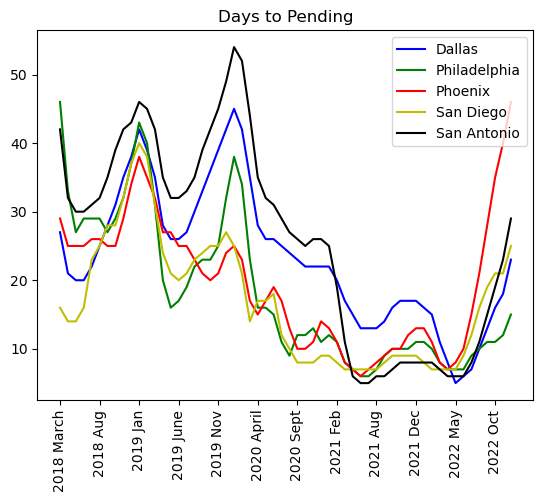

In [50]:
plt.plot(days_to_pen_clean["Dallas, TX"], 'b-', label = "Dallas")
plt.plot(days_to_pen_clean["Philadelphia, PA"], 'g-', label = "Philadelphia")
plt.plot(days_to_pen_clean["Phoenix, AZ"], 'r-', label = "Phoenix")
plt.plot(days_to_pen_clean["San Diego, CA"], 'y-', label = "San Diego")
plt.plot(days_to_pen_clean["San Antonio, TX"], 'k-', label = "San Antonio")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.title("Days to Pending")
plt.legend()

In [51]:
#Housing Market Correlations

In [52]:
#create reference to csv file
days_to_pend = pd.read_csv("Resources/AverageDaystoPending.csv")
num_new_properties = pd.read_csv("Resources/MonthlyNumberofNewListings.csv")
price_cuts = pd.read_csv("Resources/AverageNumberofPropertieswithPriceCut.csv")

In [53]:
#narrow down results to 5 cities
days_to_pending = days_to_pend[(days_to_pend['RegionName'] == 'Philadelphia, PA') | (days_to_pend['RegionName'] == 'Phoenix, AZ') | (days_to_pend['RegionName'] == 'San Antonio, TX') \
                               | (days_to_pend['RegionName'] == 'San Diego, CA') | (days_to_pend['RegionName'] == 'Dallas, TX')]

num_new_prop = num_new_properties[(num_new_properties['RegionName'] == 'Philadelphia, PA') | (num_new_properties['RegionName'] == 'Phoenix, AZ') | (num_new_properties['RegionName'] == 'San Antonio, TX') \
                               | (num_new_properties['RegionName'] == 'San Diego, CA') | (num_new_properties['RegionName'] == 'Dallas, TX')]

price_cut = price_cuts[(price_cuts['RegionName'] == 'Philadelphia, PA') | (price_cuts['RegionName'] == 'Phoenix, AZ') | (price_cuts['RegionName'] == 'San Antonio, TX') \
                               | (price_cuts['RegionName'] == 'San Diego, CA') | (price_cuts['RegionName'] == 'Dallas, TX')]


In [54]:
#reduce number of columns in each dataframe
days_pending = pd.DataFrame(days_to_pending[["RegionName",
                                             "2018-04-30",
                                             "2018-09-30",
                                             "2019-04-30",
                                             "2019-09-30",
                                             "2020-04-30",
                                             "2020-09-30",
                                             "2021-04-30",
                                             "2021-09-30",
                                             "2022-04-30",
                                            "2022-09-30"]])

num_of_new_prop = pd.DataFrame(num_new_prop[["RegionName",
                                            "2018-04-30",
                                             "2018-09-30",
                                             "2019-04-30",
                                             "2019-09-30",
                                             "2020-04-30",
                                             "2020-09-30",
                                             "2021-04-30",
                                             "2021-09-30",
                                             "2022-04-30",
                                            "2022-09-30"]])

prices_cuts = pd.DataFrame(price_cut[["RegionName",
                                            "2018-04-30",
                                             "2018-09-30",
                                             "2019-04-30",
                                             "2019-09-30",
                                             "2020-04-30",
                                             "2020-09-30",
                                             "2021-04-30",
                                             "2021-09-30",
                                             "2022-04-30",
                                            "2022-09-30"]])


In [55]:
days_pending.rename(columns = {'2018-04-30':'dp_April_2018',
                               '2018-09-30':'dp_Sept_2018',
                               '2019-04-30':'dp_April_2019',
                               '2019-09-30':'dp_Sept_2019',
                               '2020-04-30':'dp_April_2020',
                               '2020-09-30':'dp_Sept_2020',
                               '2021-04-30':'dp_April_2021',
                               '2021-09-30':'dp_Sept_2021',
                               '2022-04-30':'dp_April_2022',
                               '2022-09-30':'dp_Sept_2022'}, inplace=True)

num_of_new_prop.rename(columns = {'2018-04-30':'nnp_April_2018',
                               '2018-09-30':'nnp_Sept_2018',
                               '2019-04-30':'nnp_April_2019',
                               '2019-09-30':'nnp_Sept_2019',
                               '2020-04-30':'nnp_April_2020',
                               '2020-09-30':'nnp_Sept_2020',
                               '2021-04-30':'nnp_April_2021',
                               '2021-09-30':'nnp_Sept_2021',
                               '2022-04-30':'nnp_April_2022',
                               '2022-09-30':'nnp_Sept_2022'}, inplace=True)


prices_cuts.rename(columns = {'2018-04-30':'pc_April_2018',
                               '2018-09-30':'pc_Sept_2018',
                               '2019-04-30':'pc_April_2019',
                               '2019-09-30':'pc_Sept_2019',
                               '2020-04-30':'pc_April_2020',
                               '2020-09-30':'pc_Sept_2020',
                               '2021-04-30':'pc_April_2021',
                               '2021-09-30':'pc_Sept_2021',
                               '2022-04-30':'pc_April_2022',
                               '2022-09-30':'pc_Sept_2022'}, inplace=True)

prices_cuts.head()


,RegionName,pc_April_2018,pc_Sept_2018,pc_April_2019,pc_Sept_2019,pc_April_2020,pc_Sept_2020,pc_April_2021,pc_Sept_2021,pc_April_2022,pc_Sept_2022
4,"Dallas, TX",9513.500000,6666.666667,6800.000000,6300.000000,6299.833333,8200.000000,10000.333333,10034.333333,10333.333333,11366.666667
8,"Philadelphia, PA",7083.333333,9000.000000,8133.333333,9609.000000,8966.666667,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
10,"Phoenix, AZ",5033.666667,5000.000000,5000.000000,5000.000000,7366.666667,9000.000000,11833.333333,11000.333333,11366.666667,11994.166667
17,"San Diego, CA",18650.000000,15336.666667,15333.000000,16366.666667,18666.666667,22300.333333,30033.333333,25366.666667,43833.333333,27333.333333
24,"San Antonio, TX",5233.333333,5433.333333,5033.333333,5033.333333,5200.333333,5933.500000,NaN,10000.000000,10000.000000,10000.000000


In [56]:
df_merge_one = pd.merge(days_pending, prices_cuts, on = "RegionName", how = "inner")
df_merge_one.head()


,RegionName,dp_April_2018,dp_Sept_2018,dp_April_2019,dp_Sept_2019,dp_April_2020,dp_Sept_2020,dp_April_2021,dp_Sept_2021,dp_April_2022,dp_Sept_2022,pc_April_2018,pc_Sept_2018,pc_April_2019,pc_Sept_2019,pc_April_2020,pc_Sept_2020,pc_April_2021,pc_Sept_2021,pc_April_2022,pc_Sept_2022
0,"Dallas, TX",21.0,28.0,28.0,33.0,28.0,23.0,15.0,16.0,8.0,13.0,9513.500000,6666.666667,6800.000000,6300.000000,6299.833333,8200.000000,10000.333333,10034.333333,10333.333333,11366.666667
1,"Philadelphia, PA",33.0,27.0,20.0,23.0,16.0,12.0,7.0,10.0,7.0,11.0,7083.333333,9000.000000,8133.333333,9609.000000,8966.666667,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2,"Phoenix, AZ",25.0,25.0,27.0,21.0,15.0,10.0,7.0,10.0,7.0,28.0,5033.666667,5000.000000,5000.000000,5000.000000,7366.666667,9000.000000,11833.333333,11000.333333,11366.666667,11994.166667
3,"San Diego, CA",14.0,28.0,24.0,24.0,17.0,8.0,7.0,9.0,7.0,19.0,18650.000000,15336.666667,15333.000000,16366.666667,18666.666667,22300.333333,30033.333333,25366.666667,43833.333333,27333.333333
4,"San Antonio, TX",32.0,35.0,35.0,39.0,35.0,26.0,6.0,7.0,6.0,15.0,5233.333333,5433.333333,5033.333333,5033.333333,5200.333333,5933.500000,NaN,10000.000000,10000.000000,10000.000000


In [57]:
df_merged = pd.merge(df_merge_one, num_of_new_prop, on = "RegionName", how = "inner")
df_merged.head()

,RegionName,dp_April_2018,dp_Sept_2018,dp_April_2019,dp_Sept_2019,dp_April_2020,dp_Sept_2020,dp_April_2021,dp_Sept_2021,dp_April_2022,dp_Sept_2022,pc_April_2018,pc_Sept_2018,pc_April_2019,pc_Sept_2019,pc_April_2020,pc_Sept_2020,pc_April_2021,pc_Sept_2021,pc_April_2022,pc_Sept_2022,nnp_April_2018,nnp_Sept_2018,nnp_April_2019,nnp_Sept_2019,nnp_April_2020,nnp_Sept_2020,nnp_April_2021,nnp_Sept_2021,nnp_April_2022,nnp_Sept_2022
0,"Dallas, TX",21.0,28.0,28.0,33.0,28.0,23.0,15.0,16.0,8.0,13.0,9513.500000,6666.666667,6800.000000,6300.000000,6299.833333,8200.000000,10000.333333,10034.333333,10333.333333,11366.666667,10075.0,10225.0,10334.0,9878.0,9009.0,10099.0,9100.0,11332.0,8689.0,9590.0
1,"Philadelphia, PA",33.0,27.0,20.0,23.0,16.0,12.0,7.0,10.0,7.0,11.0,7083.333333,9000.000000,8133.333333,9609.000000,8966.666667,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8434.0,7391.0,8326.0,7223.0,5622.0,8432.0,7695.0,8765.0,7402.0,6704.0
2,"Phoenix, AZ",25.0,25.0,27.0,21.0,15.0,10.0,7.0,10.0,7.0,28.0,5033.666667,5000.000000,5000.000000,5000.000000,7366.666667,9000.000000,11833.333333,11000.333333,11366.666667,11994.166667,9152.0,7621.0,8355.0,7243.0,7689.0,8422.0,8397.0,8756.0,8174.0,8070.0
3,"San Diego, CA",14.0,28.0,24.0,24.0,17.0,8.0,7.0,9.0,7.0,19.0,18650.000000,15336.666667,15333.000000,16366.666667,18666.666667,22300.333333,30033.333333,25366.666667,43833.333333,27333.333333,3527.0,3615.0,3369.0,3272.0,2787.0,3636.0,3317.0,3626.0,3153.0,2717.0
4,"San Antonio, TX",32.0,35.0,35.0,39.0,35.0,26.0,6.0,7.0,6.0,15.0,5233.333333,5433.333333,5033.333333,5033.333333,5200.333333,5933.500000,NaN,10000.000000,10000.000000,10000.000000,3060.0,2839.0,3103.0,2984.0,2723.0,3041.0,2771.0,3770.0,3079.0,3460.0


In [58]:
df_merged.set_index("RegionName", inplace=True)
df_merged.head()

,dp_April_2018,dp_Sept_2018,dp_April_2019,dp_Sept_2019,dp_April_2020,dp_Sept_2020,dp_April_2021,dp_Sept_2021,dp_April_2022,dp_Sept_2022,pc_April_2018,pc_Sept_2018,pc_April_2019,pc_Sept_2019,pc_April_2020,pc_Sept_2020,pc_April_2021,pc_Sept_2021,pc_April_2022,pc_Sept_2022,nnp_April_2018,nnp_Sept_2018,nnp_April_2019,nnp_Sept_2019,nnp_April_2020,nnp_Sept_2020,nnp_April_2021,nnp_Sept_2021,nnp_April_2022,nnp_Sept_2022
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",21.0,28.0,28.0,33.0,28.0,23.0,15.0,16.0,8.0,13.0,9513.500000,6666.666667,6800.000000,6300.000000,6299.833333,8200.000000,10000.333333,10034.333333,10333.333333,11366.666667,10075.0,10225.0,10334.0,9878.0,9009.0,10099.0,9100.0,11332.0,8689.0,9590.0
"Philadelphia, PA",33.0,27.0,20.0,23.0,16.0,12.0,7.0,10.0,7.0,11.0,7083.333333,9000.000000,8133.333333,9609.000000,8966.666667,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8434.0,7391.0,8326.0,7223.0,5622.0,8432.0,7695.0,8765.0,7402.0,6704.0
"Phoenix, AZ",25.0,25.0,27.0,21.0,15.0,10.0,7.0,10.0,7.0,28.0,5033.666667,5000.000000,5000.000000,5000.000000,7366.666667,9000.000000,11833.333333,11000.333333,11366.666667,11994.166667,9152.0,7621.0,8355.0,7243.0,7689.0,8422.0,8397.0,8756.0,8174.0,8070.0
"San Diego, CA",14.0,28.0,24.0,24.0,17.0,8.0,7.0,9.0,7.0,19.0,18650.000000,15336.666667,15333.000000,16366.666667,18666.666667,22300.333333,30033.333333,25366.666667,43833.333333,27333.333333,3527.0,3615.0,3369.0,3272.0,2787.0,3636.0,3317.0,3626.0,3153.0,2717.0
"San Antonio, TX",32.0,35.0,35.0,39.0,35.0,26.0,6.0,7.0,6.0,15.0,5233.333333,5433.333333,5033.333333,5033.333333,5200.333333,5933.500000,NaN,10000.000000,10000.000000,10000.000000,3060.0,2839.0,3103.0,2984.0,2723.0,3041.0,2771.0,3770.0,3079.0,3460.0


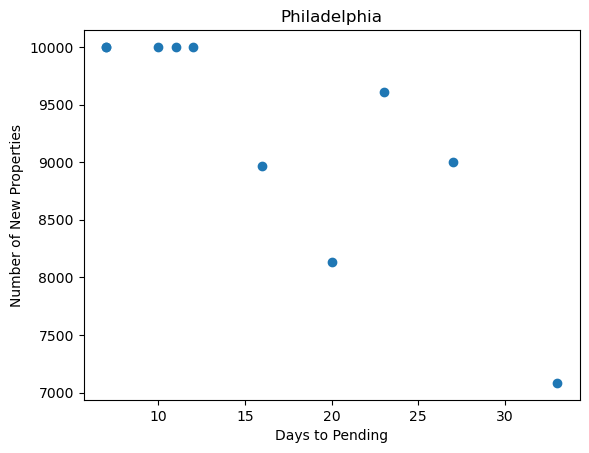

In [59]:
# Build the scatter plots for correlation
# dp 2018 = 0

plt.scatter(df_merged.iloc[1,0:10],df_merged.iloc[1,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('Philadelphia')
# Show plot
plt.show()

In [192]:
rvalue, pvalue = pearsonr(df_merged.iloc[1,0:10],df_merged.iloc[1,10:20])
print("Philadelphia")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

Philadelphia
The rvalue is -0.8304117116279692.
The p-value is 0.0029331097166108377.


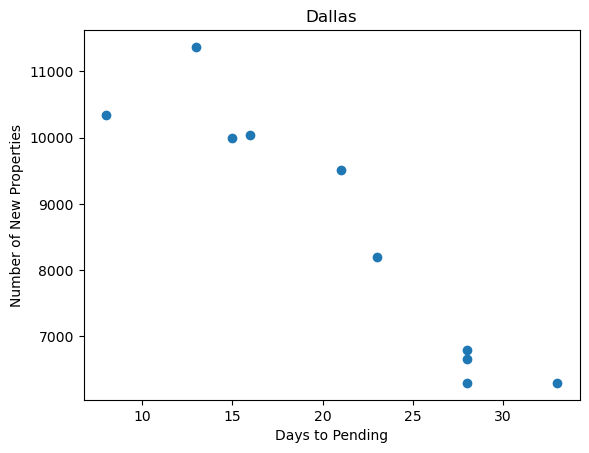

In [60]:
plt.scatter(df_merged.iloc[0,0:10],df_merged.iloc[0,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('Dallas')
# Show plot
plt.show()

In [193]:
rvalue, pvalue = pearsonr(df_merged.iloc[0,0:10],df_merged.iloc[0,10:20])
print("Dallas")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

Dallas
The rvalue is -0.9354807987965801.
The p-value is 7.009810169594656e-05.


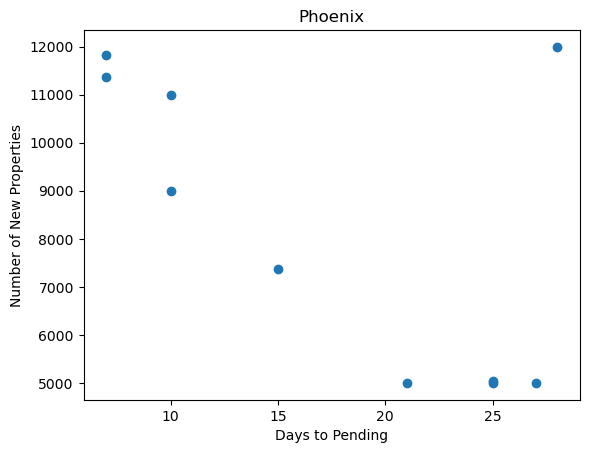

In [61]:
plt.scatter(df_merged.iloc[2,0:10],df_merged.iloc[2,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('Phoenix')
# Show plot
plt.show()

In [194]:
rvalue, pvalue = pearsonr(df_merged.iloc[2,0:10],df_merged.iloc[2,10:20])
print("Phoenix")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

Phoenix
The rvalue is -0.6047298365240713.
The p-value is 0.06401168376649478.


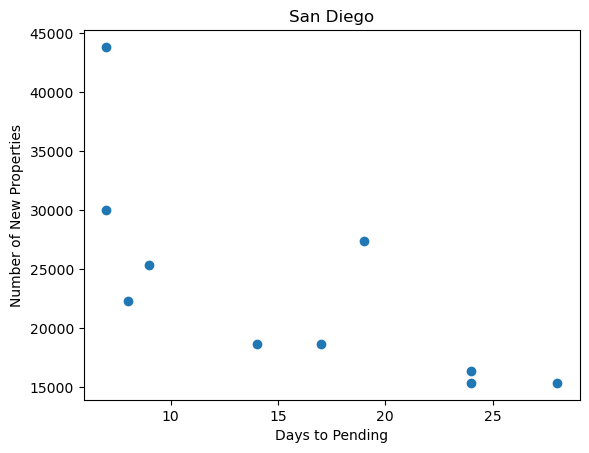

In [62]:
plt.scatter(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('San Diego')
# Show plot
plt.show()

In [195]:
rvalue, pvalue = pearsonr(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
print("San Diego")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

San Diego
The rvalue is -0.7150200663153279.
The p-value is 0.020111944659676237.


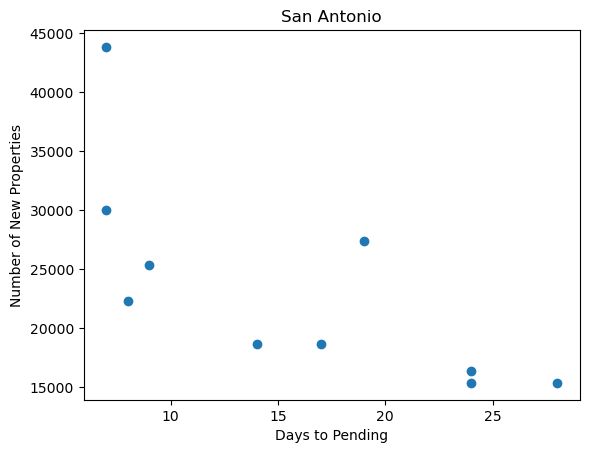

In [63]:
plt.scatter(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
plt.xlabel('Days to Pending')
plt.ylabel('Number of New Properties')
plt.title('San Antonio')
# Show plot
plt.show()

In [196]:
rvalue, pvalue = pearsonr(df_merged.iloc[3,0:10],df_merged.iloc[3,10:20])
print("San Antonio")
print(f"The rvalue is {rvalue}.")
print(f"The p-value is {pvalue}.")

San Antonio
The rvalue is -0.7150200663153279.
The p-value is 0.020111944659676237.


In [197]:
#Testing Analysis

In [198]:
# assigning datasets to variables
unemployment = pd.read_csv("Resources/UnemploymentRateCity.csv")
sales = pd.read_csv('output_data/SalePricesData.csv')
zhvi = pd.read_csv('output_data/ZHVIDAta.csv')

In [199]:
sales.describe()

,Philadelphia,Dallas,Phoenix,San Antonio,San Diego
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,265702.333333,305771.333333,341278.526316,253724.561404,657652.877193
std,32290.899310,53455.841621,75821.238869,40876.607698,95323.595798
min,214750.000000,246333.000000,255000.000000,201317.000000,545833.000000
25%,240667.000000,263333.000000,275000.000000,220333.000000,578917.000000
50%,263967.000000,284000.000000,309633.000000,244667.000000,610583.000000
75%,286767.000000,352750.000000,415000.000000,294000.000000,748333.000000
max,337167.000000,421389.000000,485367.000000,333259.000000,847833.000000


In [200]:
unemployment_short = unemployment.iloc[14:71]
unemployment_short.describe()

,Philadelphia,Phoenix,San Antonio,San Diego,Dallas
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,7.884211,4.921053,4.652632,5.112281,5.021053
std,3.426826,2.101083,2.293866,3.229555,2.322155
min,4.700000,2.500000,2.700000,2.600000,3.000000
25%,5.600000,3.800000,3.300000,3.000000,3.600000
50%,6.300000,4.400000,3.600000,3.400000,4.000000
75%,9.700000,5.300000,5.400000,6.600000,5.800000
max,17.100000,13.300000,13.000000,15.900000,12.700000


In [201]:
zhvi.describe()

,Philadelphia,Phoenix,San Antonio,San Diego,Dallas
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,202001.183333,299625.900000,230122.200000,735245.633333,253854.250000
std,25213.164604,70430.842444,36685.957108,133671.059794,41266.676987
min,161496.000000,221437.000000,189884.000000,601663.000000,199922.000000
25%,181910.250000,240351.750000,203662.750000,626138.500000,227001.750000
50%,194672.500000,267265.500000,210813.000000,660103.000000,233606.500000
75%,227061.000000,369382.500000,257923.750000,855843.250000,284574.750000
max,246115.000000,428493.000000,299066.000000,986746.000000,336213.000000


In [69]:
unemployment.head(15)
unemployment_2 = unemployment.iloc[12:72]
unemployment_2.describe()

,Philadelphia,Phoenix,San Antonio,San Diego,Dallas
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,7.776667,4.866667,4.590000,5.021667,4.961667
std,3.377612,2.068871,2.251907,3.172984,2.278424
min,4.500000,2.500000,2.700000,2.600000,3.000000
25%,5.600000,3.750000,3.275000,3.000000,3.600000
50%,6.300000,4.350000,3.550000,3.450000,4.000000
75%,9.625000,5.225000,5.250000,6.450000,5.800000
max,17.100000,13.300000,13.000000,15.900000,12.700000


In [70]:
for city in unemployment:
    if city == "Date ":
        pass
    else:
        print(f"Calculating {city}")
        rvalue, pvalue = pearsonr(unemployment_short[city], sales[city])
        print(f"The r-value is {rvalue}.")
        print(f"The p-value is {pvalue}.")

Calculating Philadelphia
The r-value is 0.11093866389292777.
The p-value is 0.4113314026045318.
Calculating Phoenix
The r-value is -0.30182372557711606.
The p-value is 0.022505129886153497.
Calculating San Antonio
The r-value is 0.021351315767745765.
The p-value is 0.8747361382148577.
Calculating San Diego
The r-value is -0.07754043617310949.
The p-value is 0.5664334274099181.
Calculating Dallas
The r-value is -0.07110491172092398.
The p-value is 0.5991639933778515.


In [71]:
for city in unemployment:
    if city == "Date ":
        pass
    else:
        print(f"Calculating {city}")
        rvalue, pvalue = pearsonr(unemployment_2[city], zhvi[city])
        print(f"The r-value is {rvalue}.")
        print(f"The p-value is {pvalue}.")  

Calculating Philadelphia
The r-value is 0.07229899805419329.
The p-value is 0.5830300353651033.
Calculating Phoenix
The r-value is -0.3221096658020619.
The p-value is 0.012078232897878734.
Calculating San Antonio
The r-value is -0.08271456867317167.
The p-value is 0.5298044802907931.
Calculating San Diego
The r-value is -0.13025010918109747.
The p-value is 0.32123500617328693.
Calculating Dallas
The r-value is -0.12061142148631546.
The p-value is 0.35864179359911624.
